<b><font color="SteelBlue" size="+3">Préparez des données pour un organisme de santé publique</font></b>

# Introduction

## Contexte

Dans le cadre d'une initiative de l'agence Santé publique France, nous abordons un projet ambitieux visant à améliorer la base de données Open Food Facts, une ressource open source cruciale dans la compréhension de la qualité nutritionnelle des produits alimentaires. Cette base de données, utilisée tant par des particuliers que des organisations, souffre actuellement de lacunes liées à des erreurs de saisie et à l'absence de certaines informations. Pour y remédier, notre entreprise a été sollicitée pour développer un système de suggestion ou d'auto-complétion, facilitant ainsi l'ajout de données par les utilisateurs. Ce projet s'inscrit dans une démarche d'amélioration continue de la qualité des informations nutritionnelles disponibles pour le grand public.

## Objectifs

Notre objectif principal est la création d'un outil d'auto-complétion efficace et fiable pour la base de données Open Food Facts. La première étape consistera à nettoyer et explorer en profondeur les données actuelles, en identifiant et traitant les valeurs manquantes et aberrantes. Nous devrons également automatiser ces traitements pour assurer leur efficacité sur des données évolutives. Parallèlement, une analyse statistique univariée et multivariée sera menée pour comprendre les dynamiques sous-jacentes des données. Enfin, nous produirons un rapport d'exploration et une présentation claire, en mettant un accent particulier sur le respect des principes du RGPD, pour démontrer la faisabilité de l'outil d'auto-complétion et orienter les futures décisions de Santé publique France.

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os
from IPython.display import display

# Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from IPython.display import Image

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1svg_notebook_012024.ipynb',
 'Deveau_Estelle_1_notebook2_012024.ipynb',
 'Deveau_Estelle_1_notebook_012024.ipynb']

In [3]:
os.listdir("data/sources/")

['fr.openfoodfacts.org.products.csv', 'fr.openfoodfacts.org.products.csv.zip']

In [4]:
path     = "./data/sources/"
filename1 = "fr.openfoodfacts.org.products.csv"

In [5]:
data = pd.read_csv(path + filename1, sep='\t', encoding='utf-8')

C:\Users\estel\AppData\Local\Temp\ipykernel_115884\1506192187.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path + filename1, sep='\t', encoding='utf-8')


# Exploration des données

## Quick tour

In [6]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(320772, 162)

In [8]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
data.dtypes.value_counts()

float64    106
object      56
Name: count, dtype: int64

In [10]:
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

In [11]:
data.nunique()

code                                          320638
url                                           320749
creator                                         3535
created_t                                     189636
created_datetime                              189568
last_modified_t                               180639
last_modified_datetime                        180495
product_name                                  221347
generic_name                                   38584
quantity                                       13826
packaging                                      14547
packaging_tags                                 12064
brands                                         58784
brands_tags                                    50253
categories                                     36982
categories_tags                                21142
categories_fr                                  21152
origins                                         4840
origins_tags                                  

In [12]:
# Valeurs manquantes
missing_values_count = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 76.22 %


In [13]:
percent_missing_values =  round((missing_values_count / len(data)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
code,23,0.01
url,23,0.01
creator,2,0.00
created_t,3,0.00
created_datetime,9,0.00
last_modified_t,0,0.00
last_modified_datetime,0,0.00
product_name,17762,5.54
generic_name,267977,83.54
quantity,215953,67.32


<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

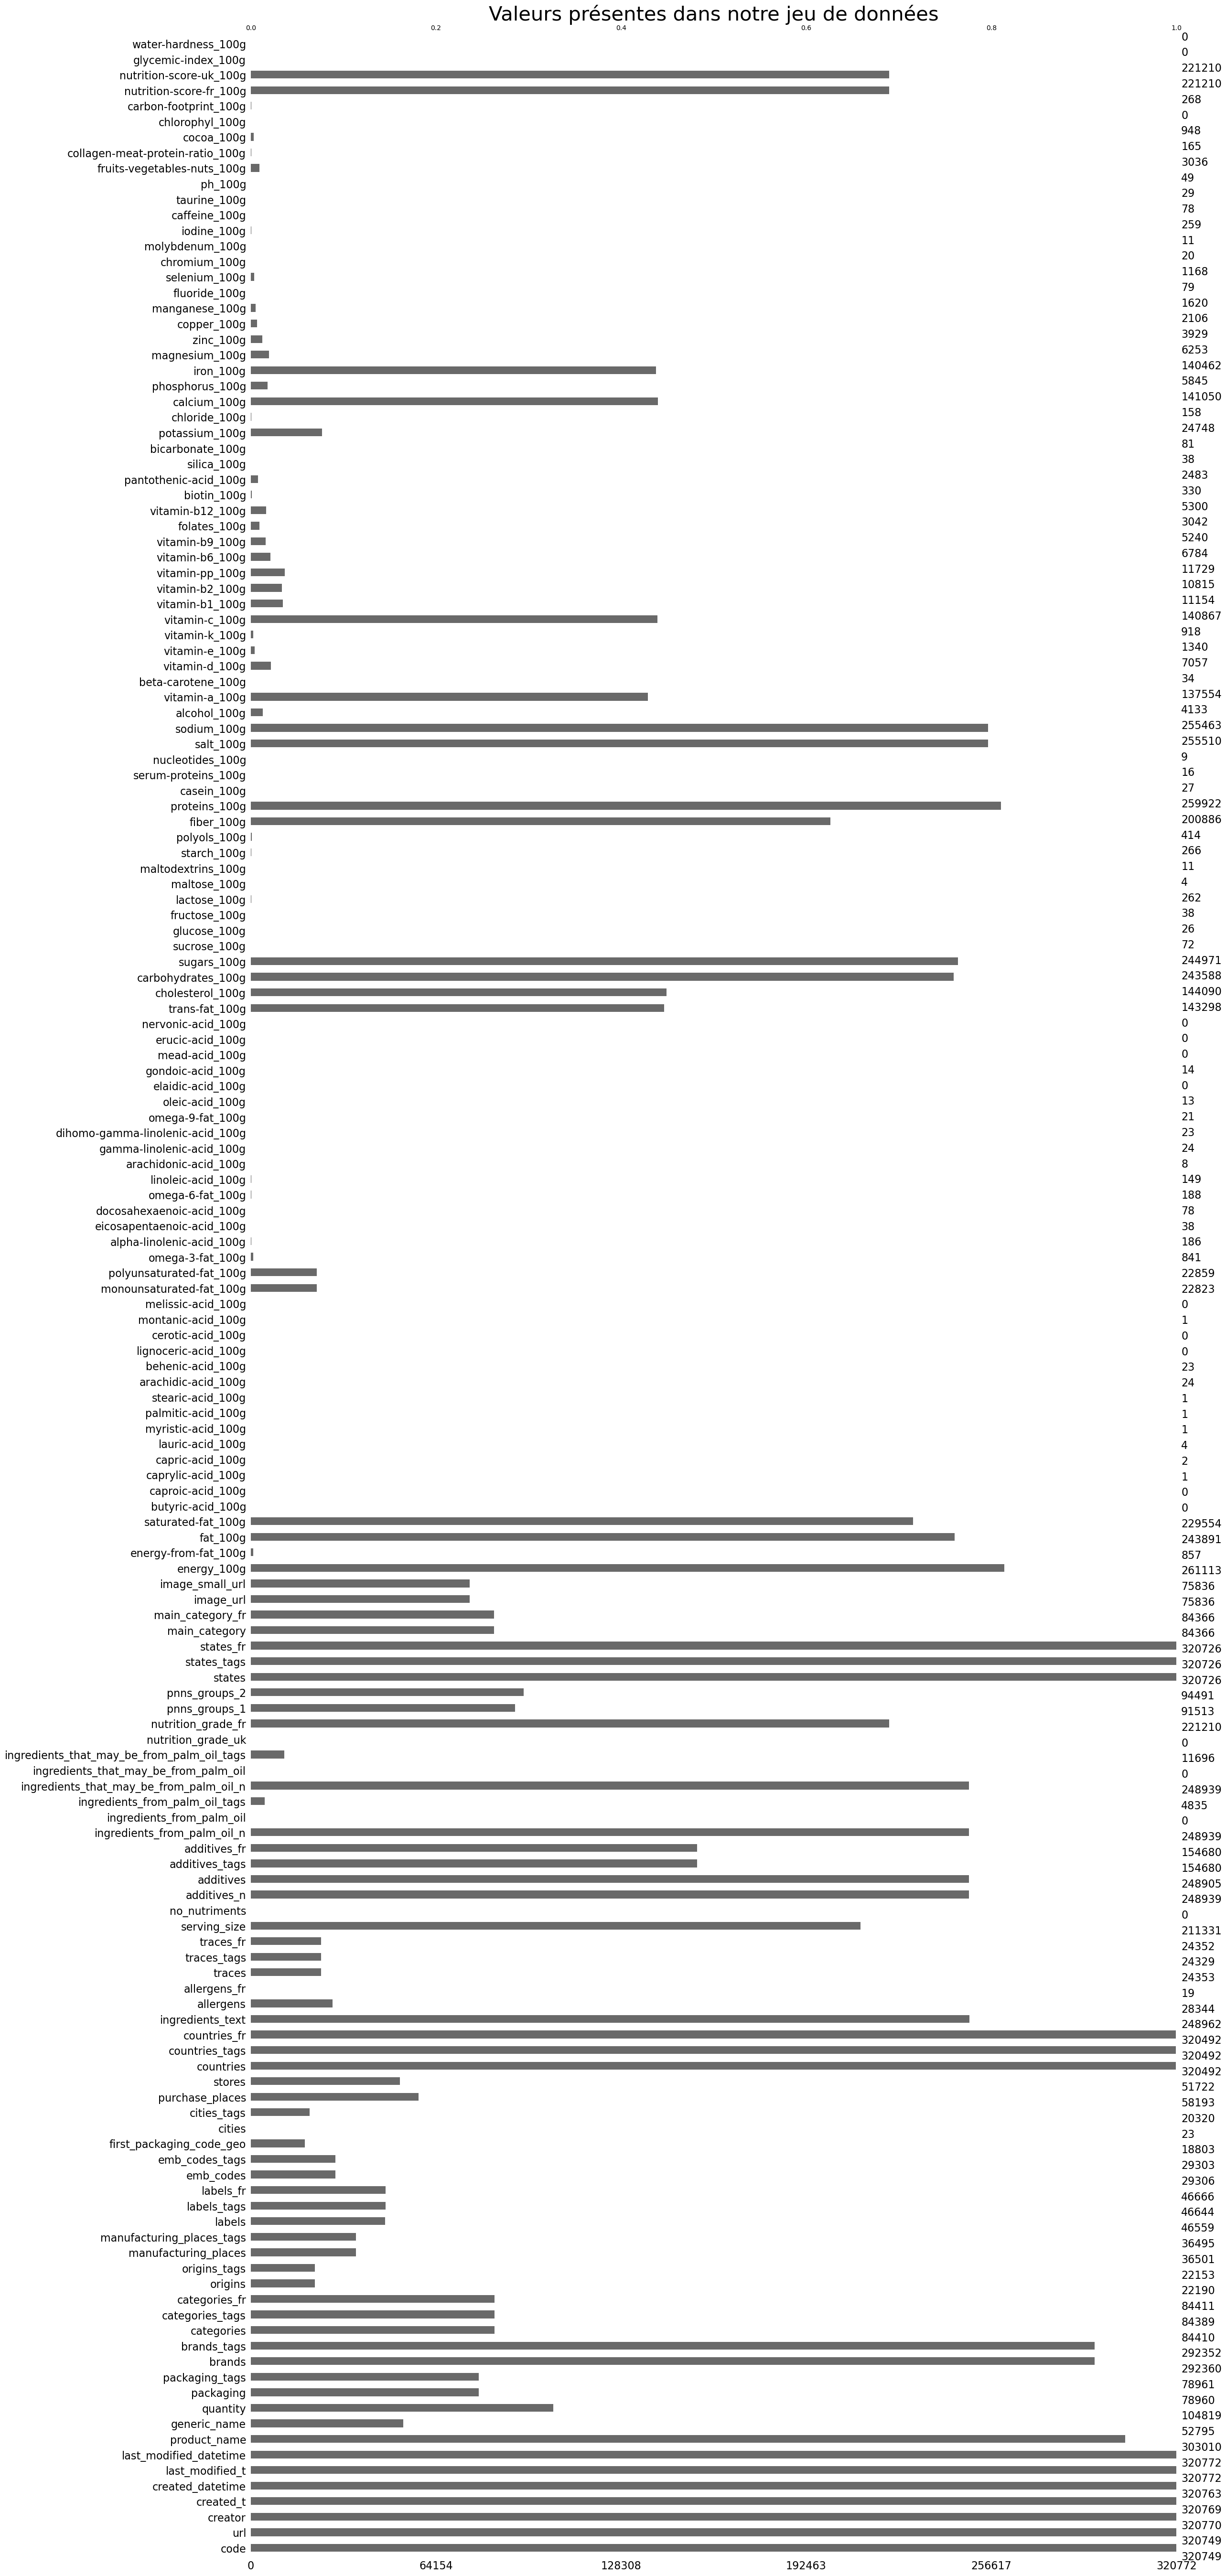

In [14]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(data)

Beaucoup de valeurs manquantes, dont plus de 5% des noms de produits, et quelques colonnes entièrement vides.

## Définition et Compréhension des Variables

Après analyse des variables, nous pouvons les classer en 7 catégories :

1. Informations Générales sur le Produit<br>
    Identifiants et URL: 'code', 'url'<br>
    Création et Modification: 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime'<br>
    Nom et Description: 'product_name', 'generic_name'<br>
    Quantité et Emballage: 'quantity', 'packaging', 'packaging_tags'<br>

2. Informations de Marque et de Fabrication<br>
    Marques: 'brands', 'brands_tags'<br>
    Lieux de Fabrication: 'manufacturing_places', 'manufacturing_places_tags', 'first_packaging_code_geo'<br>
    Labels: 'labels', 'labels_tags', 'labels_fr'<br>

3. Catégorisation et Origine du Produit<br>
    Catégories: 'categories', 'categories_tags', 'categories_fr', 'main_category', 'main_category_fr'<br>
    Origines: 'origins', 'origins_tags'<br>
    Lieux d'Achat et de Vente: 'purchase_places', 'stores', 'cities', 'cities_tags', 'countries', 'countries_tags', 'countries_fr'<br>

4. Ingrédients et Additifs<br>
    Ingrédients: 'ingredients_text', 'additives_n', 'additives', 'additives_tags', 'additives_fr'<br>
    Allergènes et Traces: 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr'<br>
    Huile de Palme: 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags'<br>

5. Informations Nutritionnelles<br>
    Valeurs Énergétiques et Graisses: 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', divers acides gras.<br>
    Sucres et Glucides: 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g'<br>
    Protéines et Fibres: 'proteins_100g', 'fiber_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g'<br>
    Sels et Minéraux: 'salt_100g', 'sodium_100g', 'calcium_100g', 'iron_100g', 'potassium_100g', autres minéraux.<br>
    Vitamines: 'vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', autres vitamines.<br>
    Autres Nutriments: 'alcohol_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g'<br>

6. Évaluation Environnementale et Nutritionnelle<br>
    Empreinte Carbone et Durabilité: 'carbon-footprint_100g', 'water-hardness_100g', 'chlorophyl_100g'<br>
    Scores Nutritionnels: 'nutrition-score-fr_100g', 'nutrition_grade_fr', 'nutrition-score-uk_100g', 'glycemic-index_100g'<br>

7. Autres Informations<br>
    Images : 'image_url', 'image_small_url'<br>
    États et Statuts : 'states', 'states_tags', 'states_fr' <br>
    Groupes PNNS : 'pnns_groups_1', 'pnns_groups_2'<br>

## Sélection de la variable cible et élimination des colonnes non pertinentes.

Dans le cadre de notre projet dédié à l'optimisation de la base de données Open Food Facts pour l'agence Santé publique France, notre choix s'est porté sur la variable 'nutrition_grade_fr' comme cible principale.

Comme le 'nutrition_grade_fr' ne concerne que la France, nous allons commencer par ne conserver que les produits vendus en France.

In [15]:
# Afficher les valeurs uniques dans la colonne 'countries_tags'
unique_countries = data['countries_tags'].unique()
print(unique_countries)


['en:france' 'en:united-states' 'en:united-kingdom'
 'en:france,en:united-states' 'en:canada' 'en:switzerland' 'en:spain'
 'en:germany' 'en:slovenia' 'en:italy' 'en:romania' 'en:australia'
 'en:portugal' 'en:france,en:united-kingdom'
 'en:belgium,en:france,en:netherlands,en:united-kingdom' 'en:guadeloupe'
 nan 'en:united-kingdom,en:united-states' 'en:canada,en:united-states'
 'en:netherlands' 'en:australia,en:france'
 'en:canada,en:france,en:switzerland,en:united-states'
 'en:france,en:united-states,en:etats-unis' 'en:ireland'
 'en:france,en:reunion' 'en:taiwan' 'en:australia,en:switzerland'
 'en:france,en:germany' 'en:brazil' 'en:belgium,en:france'
 'en:dominican-republic' 'en:united-states,en:australie' 'en:saudi-arabia'
 'en:united-arab-emirates' 'en:iraq' 'en:kuwait' 'en:moldova' 'en:belgium'
 'en:new-caledonia' 'en:singapore' 'en:finland'
 'en:australia,en:united-states' 'en:france,en:switzerland'
 'en:australia,en:new-zealand,en:singapore,en:thailand,en:united-states'
 'en:french

In [16]:
# Fonction pour filtrer les données et ne garder que les lignes où 'countries_tags' contient 'france'
def keep_fr_data(dataframe):
    dataframe = dataframe[dataframe['countries_tags'].str.contains('france', case=False, na=False)]
    return dataframe

In [17]:
# Conserver uniquement les données des produits vendus en France
data_fr = keep_fr_data(data)
data_fr.shape

(98440, 162)

Pour prédire efficacement la variable cible 'nutrition_grade_fr', il est essentiel de conserver des variables qui sont susceptibles d'avoir une relation directe ou indirecte avec le calcul de son score. Voici une sélection de variables pertinentes, en tenant compte de leur potentiel informatif :

Données Nutritionnelles :

    energy_100g : Énergie du produit pour 100g. Indispensable car l'énergie est un élément clé de la qualité nutritionnelle.
    fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g : Ces macronutriments sont directement liés à la qualité nutritionnelle.

Autres Variables Pertinentes :

    pnns_groups_1 et pnns_groups_2 : Groupes alimentaires qui peuvent donner des indications sur le type de nourriture.

In [18]:
# Liste des colonnes à conserver
columns_to_keep = [
    'code', 'product_name', 'brands_tags', 'nutrition_grade_fr', 'nutrition-score-fr_100g',
    'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'alcohol_100g', 'salt_100g', 'energy_100g', 
    'pnns_groups_1', 'pnns_groups_2'
]

In [19]:
# Fonction pour conserver uniquement les variables d'interêt pour prédire notre variable cible et éliminer les données où la variable cible est manquante
def filter_data(dataframe, cible, columns):
    # nouveau dataframe avec uniquement les variables d'intérêt
    filtered_data = dataframe[columns]
    
    # Supprimer les lignes où 'pnns_groups_1' est manquant
    filtered_data = filtered_data.dropna(subset=[cible])

    # Supprimer les lignes où 'code' est manquant
    filtered_data = filtered_data.dropna(subset=['code'])

    return filtered_data

In [20]:
filtered_data = filter_data(data_fr, 'pnns_groups_1', columns_to_keep)

In [21]:
filtered_data.shape

(64881, 16)

In [22]:
filtered_data.head(5)

,code,product_name,brands_tags,nutrition_grade_fr,nutrition-score-fr_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,alcohol_100g,salt_100g,energy_100g,pnns_groups_1,pnns_groups_2
46,24600,Filet de bœuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
106,36252,Lion Peanut x2,sunridge,e,22.0,20.00,12.5,70.00,57.5,2.50,2.5,NaN,0.09652,1883.0,unknown,unknown
136,39259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
138,39529,Pack de 2 Twix,"twix,lundberg",NaN,NaN,4.17,NaN,77.08,NaN,6.25,6.2,NaN,NaN,1481.0,unknown,unknown
182,5200016,lentilles vertes,bertrand-lejeune,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cereals and potatoes,Legumes


# Nettoyage des Données

## Format des données

In [23]:
print(filtered_data.dtypes)

code                        object
product_name                object
brands_tags                 object
nutrition_grade_fr          object
nutrition-score-fr_100g    float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
proteins_100g              float64
fiber_100g                 float64
alcohol_100g               float64
salt_100g                  float64
energy_100g                float64
pnns_groups_1               object
pnns_groups_2               object
dtype: object


In [24]:
# Parcourir chaque colonne et vérifier les types de données uniques pour les colonnes de type 'object'
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        unique_types = filtered_data[col].apply(lambda x: type(x)).unique()
        print(f"Colonne '{col}' a les types de données : {unique_types}")

Colonne 'code' a les types de données : [<class 'int'> <class 'str'>]
Colonne 'product_name' a les types de données : [<class 'str'> <class 'float'>]
Colonne 'brands_tags' a les types de données : [<class 'float'> <class 'str'>]
Colonne 'nutrition_grade_fr' a les types de données : [<class 'float'> <class 'str'>]
Colonne 'pnns_groups_1' a les types de données : [<class 'str'>]
Colonne 'pnns_groups_2' a les types de données : [<class 'str'>]


On remarque qu'il y a des int dans la colonne code.

In [25]:
filtered_data['code'] = filtered_data['code'].astype(str)

Lors de notre examen des données, nous avons pu remarquer la présence de valeurs "unknown", nous decidons de formater toutes les valeurs manquantes pour avoir un type unique NaN.

In [26]:
# Uniformisation des valeurs manquantes
def clean_nan(data):
    # Copie du dataframe
    data_copy = data.copy()

    # Remplacement des représentations non conventionnelles de NaN
    nan_values = ['na', 'unknown', ' ']
       
    total_nan_values = sum(data_copy.isin(nan_values).sum())
    print("Nombre de NaN non conventionnelles dans notre dataframe: ", total_nan_values)

    data_copy.replace(nan_values, np.nan, inplace=True)
    
    return data_copy

In [27]:
df_cleaned = clean_nan(filtered_data)

Nombre de NaN non conventionnelles dans notre dataframe:  24997


In [28]:
# On recommence la suppression des lignes où 'nutrition_grade_fr' est manquant
df_cleaned = df_cleaned.dropna(subset=['nutrition_grade_fr'])

In [29]:
df_cleaned.shape

(47230, 16)

In [30]:
df_cleaned.nunique()

code                       47229
product_name               38821
brands_tags                 7388
nutrition_grade_fr             5
nutrition-score-fr_100g       52
fat_100g                    1117
saturated-fat_100g          1034
carbohydrates_100g          1304
sugars_100g                 1327
proteins_100g                880
fiber_100g                   629
alcohol_100g                  25
salt_100g                   2178
energy_100g                 3185
pnns_groups_1                 12
pnns_groups_2                 37
dtype: int64

In [31]:
# Afficher les valeurs uniques du pnns groups 1
print(df_cleaned['pnns_groups_1'].unique())

[nan 'Beverages' 'Sugary snacks' 'Composite foods' 'Fruits and vegetables'
 'Milk and dairy products' 'Fat and sauces' 'Salty snacks'
 'Cereals and potatoes' 'Fish Meat Eggs' 'fruits-and-vegetables'
 'sugary-snacks' 'cereals-and-potatoes']


On remarque la présence de 'Fruits and vegetables' et de 'fruits-and-vegetables', idem pour 'sugary-snacks' et 'cereals-and-potatoes'. On va uniformiser les données.

In [32]:
def standardize_pnns_groups_1(value):
    if pd.isna(value):
        return value  # Garde les valeurs NaN telles quelles
    value = value.lower()  # Convertit en minuscules
    value = value.replace('-', ' ')  # Remplace les tirets par des espaces
    value = value.replace(' and ', ' ')  # Supprime les ' and '
    return value

In [33]:
df_cleaned['pnns_groups_1'] = df_cleaned['pnns_groups_1'].apply(standardize_pnns_groups_1)

# Vérifier les valeurs uniques après uniformisation
print(df_cleaned['pnns_groups_1'].nunique())
print(df_cleaned['pnns_groups_1'].unique())

9
[nan 'beverages' 'sugary snacks' 'composite foods' 'fruits vegetables'
 'milk dairy products' 'fat sauces' 'salty snacks' 'cereals potatoes'
 'fish meat eggs']


In [34]:
# Afficher les valeurs uniques du pnns groups 2
print(df_cleaned['pnns_groups_2'].unique())

[nan 'Sweetened beverages' 'Biscuits and cakes' 'One-dish meals' 'Soups'
 'Non-sugared beverages' 'Cheese' 'Sweets' 'Sandwich'
 'Dressings and sauces' 'Appetizers' 'Nuts' 'Dried fruits'
 'Breakfast cereals' 'Pizza pies and quiche' 'Fruits' 'Fruit juices'
 'Cereals' 'Vegetables' 'Bread' 'Chocolate products' 'Processed meat'
 'Legumes' 'vegetables' 'Ice cream' 'Fish and seafood' 'pastries'
 'Milk and yogurt' 'Dairy desserts' 'Meat' 'Fats'
 'Artificially sweetened beverages' 'Fruit nectars' 'Potatoes'
 'Salty and fatty products' 'Eggs' 'fruits' 'cereals']


On remarque des doublons avec uniquement la majuscule en début de nom du groupe ou une minuscule. On va uniformiser avec des minuscules partout.

In [35]:
# Convertir toutes les valeurs en minuscules pour uniformiser la casse
df_cleaned['pnns_groups_2'] = df_cleaned['pnns_groups_2'].str.lower()

# Vérifier à nouveau les valeurs uniques après uniformisation
print(df_cleaned['pnns_groups_2'].nunique())
print(df_cleaned['pnns_groups_2'].unique())

34
[nan 'sweetened beverages' 'biscuits and cakes' 'one-dish meals' 'soups'
 'non-sugared beverages' 'cheese' 'sweets' 'sandwich'
 'dressings and sauces' 'appetizers' 'nuts' 'dried fruits'
 'breakfast cereals' 'pizza pies and quiche' 'fruits' 'fruit juices'
 'cereals' 'vegetables' 'bread' 'chocolate products' 'processed meat'
 'legumes' 'ice cream' 'fish and seafood' 'pastries' 'milk and yogurt'
 'dairy desserts' 'meat' 'fats' 'artificially sweetened beverages'
 'fruit nectars' 'potatoes' 'salty and fatty products' 'eggs']


In [36]:
#afficher les valeurs uniques du nutrition_grade_fr
print(df_cleaned['nutrition_grade_fr'].unique())

['e' 'd' 'a' 'b' 'c']


Il ne semble pas y avoir d'autres problèmes sur les formats des données.

## Recherche des doublons

In [37]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["code", "product_name"]).sum()
print('Nombre de doublons sur le code et le nom :', nb_doublons_code_name)

Nombre de doublons sur le code et le nom : 0


In [38]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["code", "brands_tags"]).sum()
print('Nombre de doublons sur le code et le nom :', nb_doublons_code_name)

Nombre de doublons sur le code et le nom : 1


In [39]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["brands_tags","product_name"]).sum()
print('Nombre de doublons sur energy et la marque :', nb_doublons_code_name)

Nombre de doublons sur energy et la marque : 2075


In [40]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["energy_100g","product_name"]).sum()
print('Nombre de doublons sur energy et la marque :', nb_doublons_code_name)

Nombre de doublons sur energy et la marque : 1751


In [41]:
nb_doublons_code_name = df_cleaned.duplicated(subset=["energy_100g","brands_tags"]).sum()
print('Nombre de doublons sur energy et la marque :', nb_doublons_code_name)

Nombre de doublons sur energy et la marque : 8471


def remove_specific_duplicates(dataframe, subset):
    # Calculer le nombre de NaN dans chaque ligne
    dataframe['nb_nan'] = dataframe.isna().sum(axis=1)

    # Trier le DataFrame par le nombre de NaN et par les colonnes du subset
    dataframe = dataframe.sort_values(by=['nb_nan'] + subset, ascending=True)

    # Supprimer les doublons en gardant la première occurrence (la ligne avec le moins de NaN)
    dataframe = dataframe.drop_duplicates(subset=subset, keep='first')

    # Supprimer la colonne 'nb_nan' ajoutée pour le tri
    dataframe = dataframe.drop(columns=['nb_nan'])

    return dataframe

In [42]:
def remove_specific_duplicates(dataframe, subset):
    # Exclure les lignes où l'un des champs du subset est NaN
    dataframe_non_nan = dataframe.dropna(subset=subset).copy()

    # Calculer le nombre de lignes avant suppression des doublons
    initial_count = dataframe_non_nan.shape[0]

    # Calculer le nombre de NaN dans chaque ligne
    dataframe_non_nan['nb_nan'] = dataframe_non_nan.isna().sum(axis=1)

    # Trier le DataFrame par le nombre de NaN et par les colonnes du subset
    dataframe_non_nan = dataframe_non_nan.sort_values(by=['nb_nan'] + subset, ascending=True)

    # Supprimer les doublons dans les lignes non NaN, en gardant la première occurrence
    dataframe_non_nan = dataframe_non_nan.drop_duplicates(subset=subset, keep='first')

    # Calculer le nombre de lignes après suppression des doublons
    final_count = dataframe_non_nan.shape[0]

    # Supprimer la colonne 'nb_nan' ajoutée pour le tri
    dataframe_non_nan = dataframe_non_nan.drop(columns=['nb_nan'])

    # Fusionner les lignes non NaN (sans doublons) avec les lignes exclues (NaN dans subset)
    dataframe_final = pd.concat([dataframe_non_nan, dataframe[~dataframe.index.isin(dataframe_non_nan.index)]])

    # Calculer le nombre de lignes supprimées
    num_lines_removed = initial_count - final_count

    print(f"Nombre de lignes supprimées pour les doublons dans {subset} : {num_lines_removed}")

    return dataframe_final


In [43]:
df_cleaned = remove_specific_duplicates(df_cleaned, ['code', 'brands_tags'])

Nombre de lignes supprimées pour les doublons dans ['code', 'brands_tags'] : 1


In [44]:
df_cleaned = remove_specific_duplicates(df_cleaned, ['product_name', 'brands_tags'])

Nombre de lignes supprimées pour les doublons dans ['product_name', 'brands_tags'] : 1887


In [45]:
df_cleaned = remove_specific_duplicates(df_cleaned, ['product_name', 'energy_100g'])

Nombre de lignes supprimées pour les doublons dans ['product_name', 'energy_100g'] : 1716


In [46]:
df_cleaned = remove_specific_duplicates(df_cleaned, ['energy_100g', 'brands_tags'])

Nombre de lignes supprimées pour les doublons dans ['energy_100g', 'brands_tags'] : 8431


Les codes-barres et les marques nous ont servi à identifier les doublons mais n'apportent rien à notre prediction de la variable cible donc nous les supprimons du jeu de données.

In [47]:
# Suppression des codes et marque
def remove_code(dataframe):
    dataframe = dataframe.drop(['code', 'brands_tags'], axis=1)
    return dataframe

In [48]:
df_cleaned = remove_code(df_cleaned)

In [49]:
df_cleaned.shape

(47230, 14)

## Gestion des valeurs aberrantes

In [50]:
df_cleaned.describe()

,nutrition-score-fr_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,alcohol_100g,salt_100g,energy_100g
count,47230.000000,43819.000000,47150.000000,43767.000000,47150.000000,47150.000000,30690.000000,591.000000,47150.000000,4.715000e+04
mean,8.494220,13.334886,5.304338,27.801013,12.967593,7.558709,2.667028,0.253012,1.013028,1.178395e+03
std,9.035662,16.767986,8.177355,27.274258,18.574231,7.394526,4.094370,1.459265,3.483377,1.501569e+04
min,-15.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.400000,0.300000,4.100000,1.000000,1.800000,0.300000,0.000000,0.080000,4.180000e+02
50%,8.000000,7.000000,1.900000,14.800000,4.000000,6.000000,1.700000,0.000000,0.570000,1.017000e+03
75%,15.000000,21.000000,7.300000,53.000000,16.700000,10.500000,3.500000,0.000000,1.230000,1.648000e+03
max,40.000000,380.000000,210.000000,190.000000,104.000000,100.000000,178.000000,20.800000,211.000000,3.251373e+06


### Approche métier

 Le  **nutrition-score-fr_100g** doit être compris entre -15 et 40

L'**energy_100g** : Le calcul pour trouver l'énergie en KJ d'un produit est : <br>
Energie (kJ)=(Protéines(g) × 17)+(Lipides(g) × 37)+(Glucides(g) × 17)+(Alcool(g) × 29)<br>
donc l'energy_100g ne peut pas dépasser les 37*100 = 3700 et ne peut pas être inférieur à 0.


La **composition pour 100g**<br>
un aliment de 100g ne peut pas avoir de valeur négative ni plus de 100g pour les valeurs suivantes :
- fat_100g
- saturated-fat_100g
- carbohydrates_100g 	
- sugars_100g 	
- fiber_100g 	
- proteins_100g 	
- salt_100g 
- alcohol_100g

**On remplace par NaN les valeurs qui n'ont aucun sens et sont clairement issues d'une erreur de saisie. (valeurs impossible)**

In [51]:
# correction des outliers
def replace_outliers_with_nan(data):
    # Remplacer par NaN si 'nutrition-score-fr_100g' est hors de -15 à 40
    data['nutrition-score-fr_100g'] = data['nutrition-score-fr_100g'].where(data['nutrition-score-fr_100g'].between(-15, 40), np.nan)
         
    # Remplacer par NaN si 'energy_100g' est hors de 0 à 3700 (avec une petite marge de l'ordre de 2.7%)
    data['energy_100g'] = data['energy_100g'].where(data['energy_100g'].between(0, 3800), np.nan) 
    
    # Liste des colonnes composants_100g
    columns_100g = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
                    'proteins_100g', 'salt_100g', 'alcohol_100g']
    
    # Remplacer par NaN si la valeurs des composants pour 100g est hors de 0 à 100
    for col in columns_100g:
        data[col] = data[col].where(data[col].between(0, 100), np.nan) 
          
    # Remplacer par NaN si la somme des protéines, glucides et lipides est supérieure à 100 (avec une marge de 1)
    sum_cols = data[['fat_100g', 'carbohydrates_100g', 'proteins_100g']].sum(axis=1)
    data.loc[sum_cols > 101, ['fat_100g', 'carbohydrates_100g', 'proteins_100g']] = np.nan
  
    
    return data

In [52]:
df_cleaned = replace_outliers_with_nan(df_cleaned)

**Vérification de la cohérance entre les colonnes des nutriments et de l'energie.**

In [53]:
def validation_energy(df):
    # Copie temporaire de la colonne 'alcohol_100g' où les valeurs NaN sont remplacées par 0
    alcohol_100g_temp = df['alcohol_100g'].fillna(0)
    
    # Créer un masque pour les lignes avec toutes les valeurs non manquantes
    mask_complete = ~df[['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'energy_100g']].isnull().any(axis=1)

    # Calcule de l'energie en KJ
    calculated_energy = df['fat_100g'] * 37 + df['carbohydrates_100g'] * 17 + df['proteins_100g'] * 17 + alcohol_100g_temp * 29

    # Calcule la différence relative entre l'énergie calculée et l'énergie donnée
    relative_difference_kj = abs((calculated_energy - df['energy_100g']) / df['energy_100g'])

    # Identifie les lignes où la différence relative est supérieure à 5%
    mask = relative_difference_kj > 0.05

    # Compte le nombre de lignes où le calcul était faux
    count_incoherent = mask.sum()
    print(f"Nombre de lignes où l'energy et les nutriments ne sont pas cohérantes: {count_incoherent}")

    # Supprime les lignes où le masque est True dans le DataFrame original
    df = df[~mask]

    return df


In [54]:
df_cleaned = validation_energy(df_cleaned)

Nombre de lignes où l'energy et les nutriments ne sont pas cohérantes: 7471


In [55]:
def validation_sucre_saturatedfat(df):
    # Créer des masques pour identifier les lignes incohérentes
    incoherent_fat_mask = (df['saturated-fat_100g'] > df['fat_100g']) & ~df[['fat_100g', 'saturated-fat_100g']].isnull().any(axis=1)
    incoherent_sucre_mask = (df['sugars_100g'] > df['carbohydrates_100g']) & ~df[['carbohydrates_100g', 'sugars_100g']].isnull().any(axis=1)

    # Compter le nombre de lignes incohérentes pour chaque cas
    count_incoherent_fat = incoherent_fat_mask.sum()
    count_incoherent_sucre = incoherent_sucre_mask.sum()
    print(f"Nombre de lignes où les graisses saturées étaient incohérentes : {count_incoherent_fat}")
    print(f"Nombre de lignes où les sucres étaient incohérents : {count_incoherent_sucre}")

    # Supprimer les lignes incohérentes
    df = df[~incoherent_fat_mask & ~incoherent_sucre_mask]
    
    return df


In [56]:
df_cleaned = validation_sucre_saturatedfat(df_cleaned)

Nombre de lignes où les graisses saturées étaient incohérentes : 41
Nombre de lignes où les sucres étaient incohérents : 57


**Verification de la cohérance entre les nutriscore grade et score**

In [57]:
Image(url="https://get.apicbase.com/wp-content/uploads/2020/08/Nutri-Score-overview-1-1024x539.png")

In [58]:
# Seuils pour chaque groupe de nutriscore
seuils_nutriscore = {
    'a': (-15, -1),
    'b': (0, 2),
    'c': (3, 10),
    'd': (11, 18),
    'e': (19, 40)
}

In [59]:
def validation_nutrition_score(df, seuils_nutriscore):
    # Filtrer les lignes pour chaque groupe de nutriscore
    for groupe, (min_score, max_score) in seuils_nutriscore.items():
        # Sélectionner les lignes qui ne respectent pas les seuils et qui ne sont pas des boissons ou NaN
        lignes_incorrectes = df[(df['nutrition_grade_fr'] == groupe) & 
                                ((df['nutrition-score-fr_100g'] < min_score) | 
                                 (df['nutrition-score-fr_100g'] > max_score)) &
                                (df['pnns_groups_1'] != "beverages")]

        # Compter le nombre de lignes incohérentes pour chaque cas
        count_lignes_incorrectes = lignes_incorrectes.shape[0]
        print(f"Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade {groupe}: {count_lignes_incorrectes}")

        # Supprimer les lignes incorrectes du DataFrame
        df = df.drop(lignes_incorrectes.index)

    return df


In [60]:
df_cleaned = validation_nutrition_score(df_cleaned, seuils_nutriscore)

Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade a: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade b: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade c: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade d: 1
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade e: 2


In [61]:
# Seuils pour chaque groupe de nutriscore
seuils_nutriscore_boissons = {
    'a': (0,0),
    'b': (0, 1),
    'c': (2, 5),
    'd': (6, 9),
    'e': (10, 40)
}

In [62]:
def validation_nutrition_score_boisson(df, seuils_nutriscore):
    # Filtrer les lignes pour chaque groupe de nutriscore
    for groupe, (min_score, max_score) in seuils_nutriscore.items():
        # Sélectionner les lignes qui ne respectent pas les seuils et qui ne sont pas des boissons ou NaN
        lignes_incorrectes = df[(df['nutrition_grade_fr'] == groupe) & 
                                ((df['nutrition-score-fr_100g'] < min_score) | 
                                 (df['nutrition-score-fr_100g'] > max_score)) &
                                (df['pnns_groups_1'] == "beverages")]

        # Compter le nombre de lignes incohérentes pour chaque cas
        count_lignes_incorrectes = lignes_incorrectes.shape[0]
        print(f"Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade {groupe}: {count_lignes_incorrectes}")

        # Supprimer les lignes incorrectes du DataFrame
        df = df.drop(lignes_incorrectes.index)

    return df


In [63]:
df_cleaned = validation_nutrition_score_boisson(df_cleaned, seuils_nutriscore_boissons)

Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade a: 91
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade b: 73
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade c: 1
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade d: 51
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade e: 0


In [64]:
df_cleaned.shape

(39444, 14)

### Approche statistique

La comparaison entre deux produits n'a de sens que s'ils sont de la même catégrorie. Nous partirons donc sur une analyse des outliers par nutrition_grade_fr.

In [65]:
# Dictionnaire pour stocker les DataFrames de chaque groupe
grouped_dfs = {group: group_df for group, group_df in df_cleaned.groupby('nutrition_grade_fr') if group is not np.nan}


In [66]:
numerics_col = ['nutrition-score-fr_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g','proteins_100g',
                'fiber_100g','alcohol_100g','salt_100g','energy_100g']

In [67]:
# Nutriscore_grade
grade_order = ['a', 'b', 'c', 'd', 'e']
grade_colors = {'a': tuple([x/255. for x in (10, 142, 69)]), 
                'b': tuple([x/255. for x in (122, 197, 71)]), 
                'c': tuple([x/255. for x in (255, 199, 52)]), 
                'd': tuple([x/255. for x in (255, 125, 36)]), 
                'e': tuple([x/255. for x in (255, 66, 26)])}

In [68]:
# séparation des boissons et des autres aliments car le nutriscore n'est pas calculé de la même façon
df_cleaned_boisson = df_cleaned[df_cleaned['pnns_groups_1'] == "beverages"].copy()
df_cleaned_autre = df_cleaned[df_cleaned['pnns_groups_1'] != "beverages"].copy()

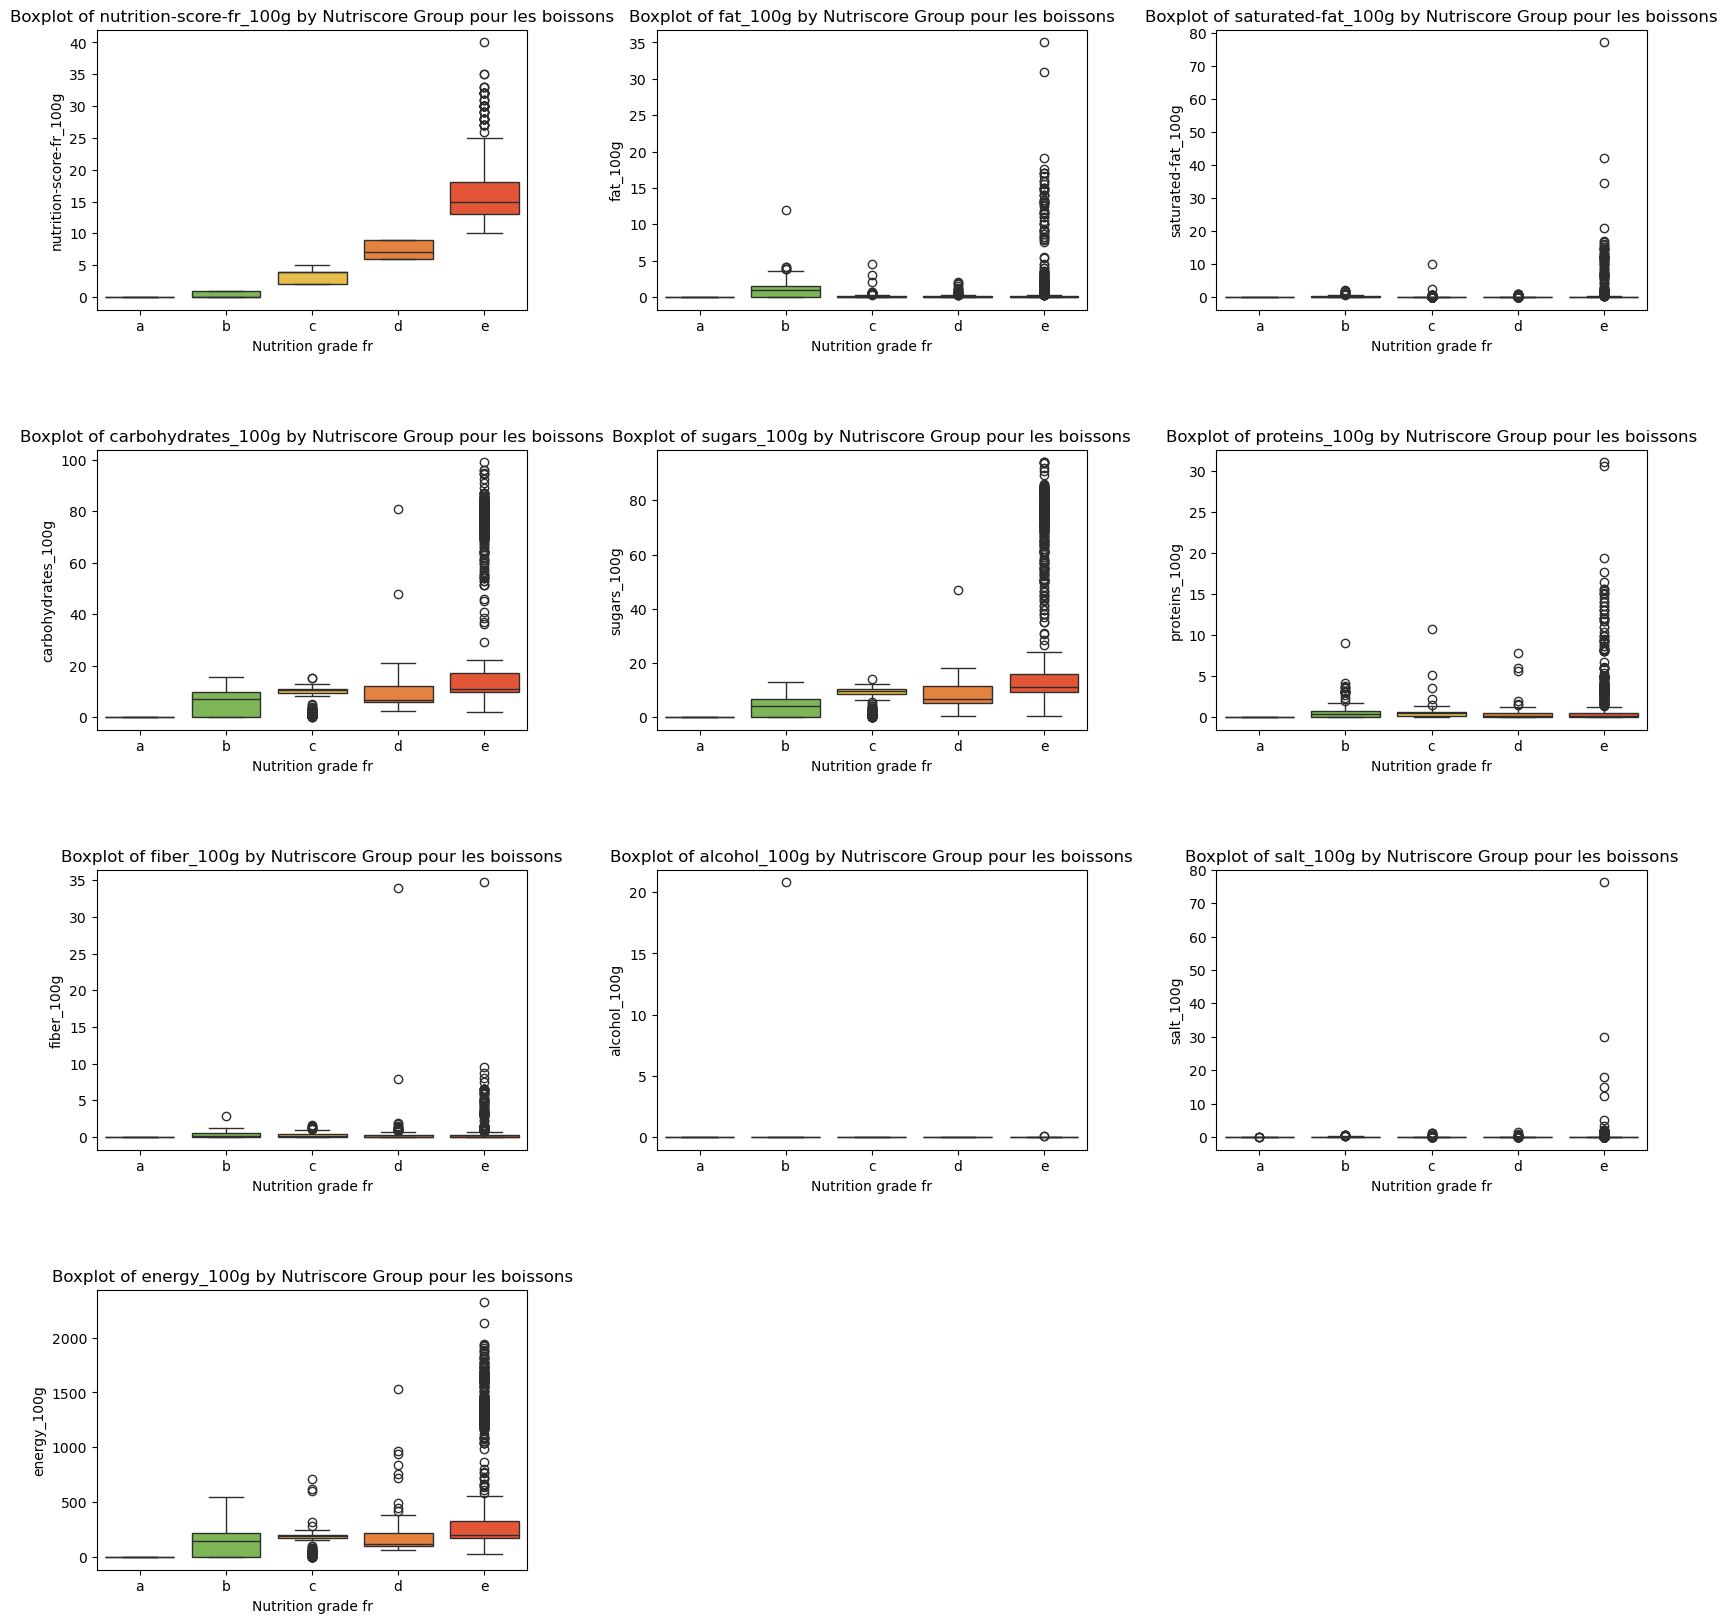

In [69]:
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Parcourir chaque colonne numérique et créer un boxplot pour chaque groupe de nutriscore
for i, col in enumerate(numerics_col):
    row = i // 3  # ligne
    col_num = i % 3  # colonne
    ax = axes[row, col_num]
    sns.boxplot(x='nutrition_grade_fr', y=col, data=df_cleaned_boisson, ax=ax, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
    ax.set_xlabel('Nutrition grade fr')
    ax.set_ylabel(col)
    ax.set_title(f'Boxplot of {col} by Nutriscore Group pour les boissons')

# Supprimer les axes vides
for i in range(len(numerics_col), 4 * 3):
    row = i // 3
    col_num = i % 3
    fig.delaxes(axes[row, col_num])

plt.show()

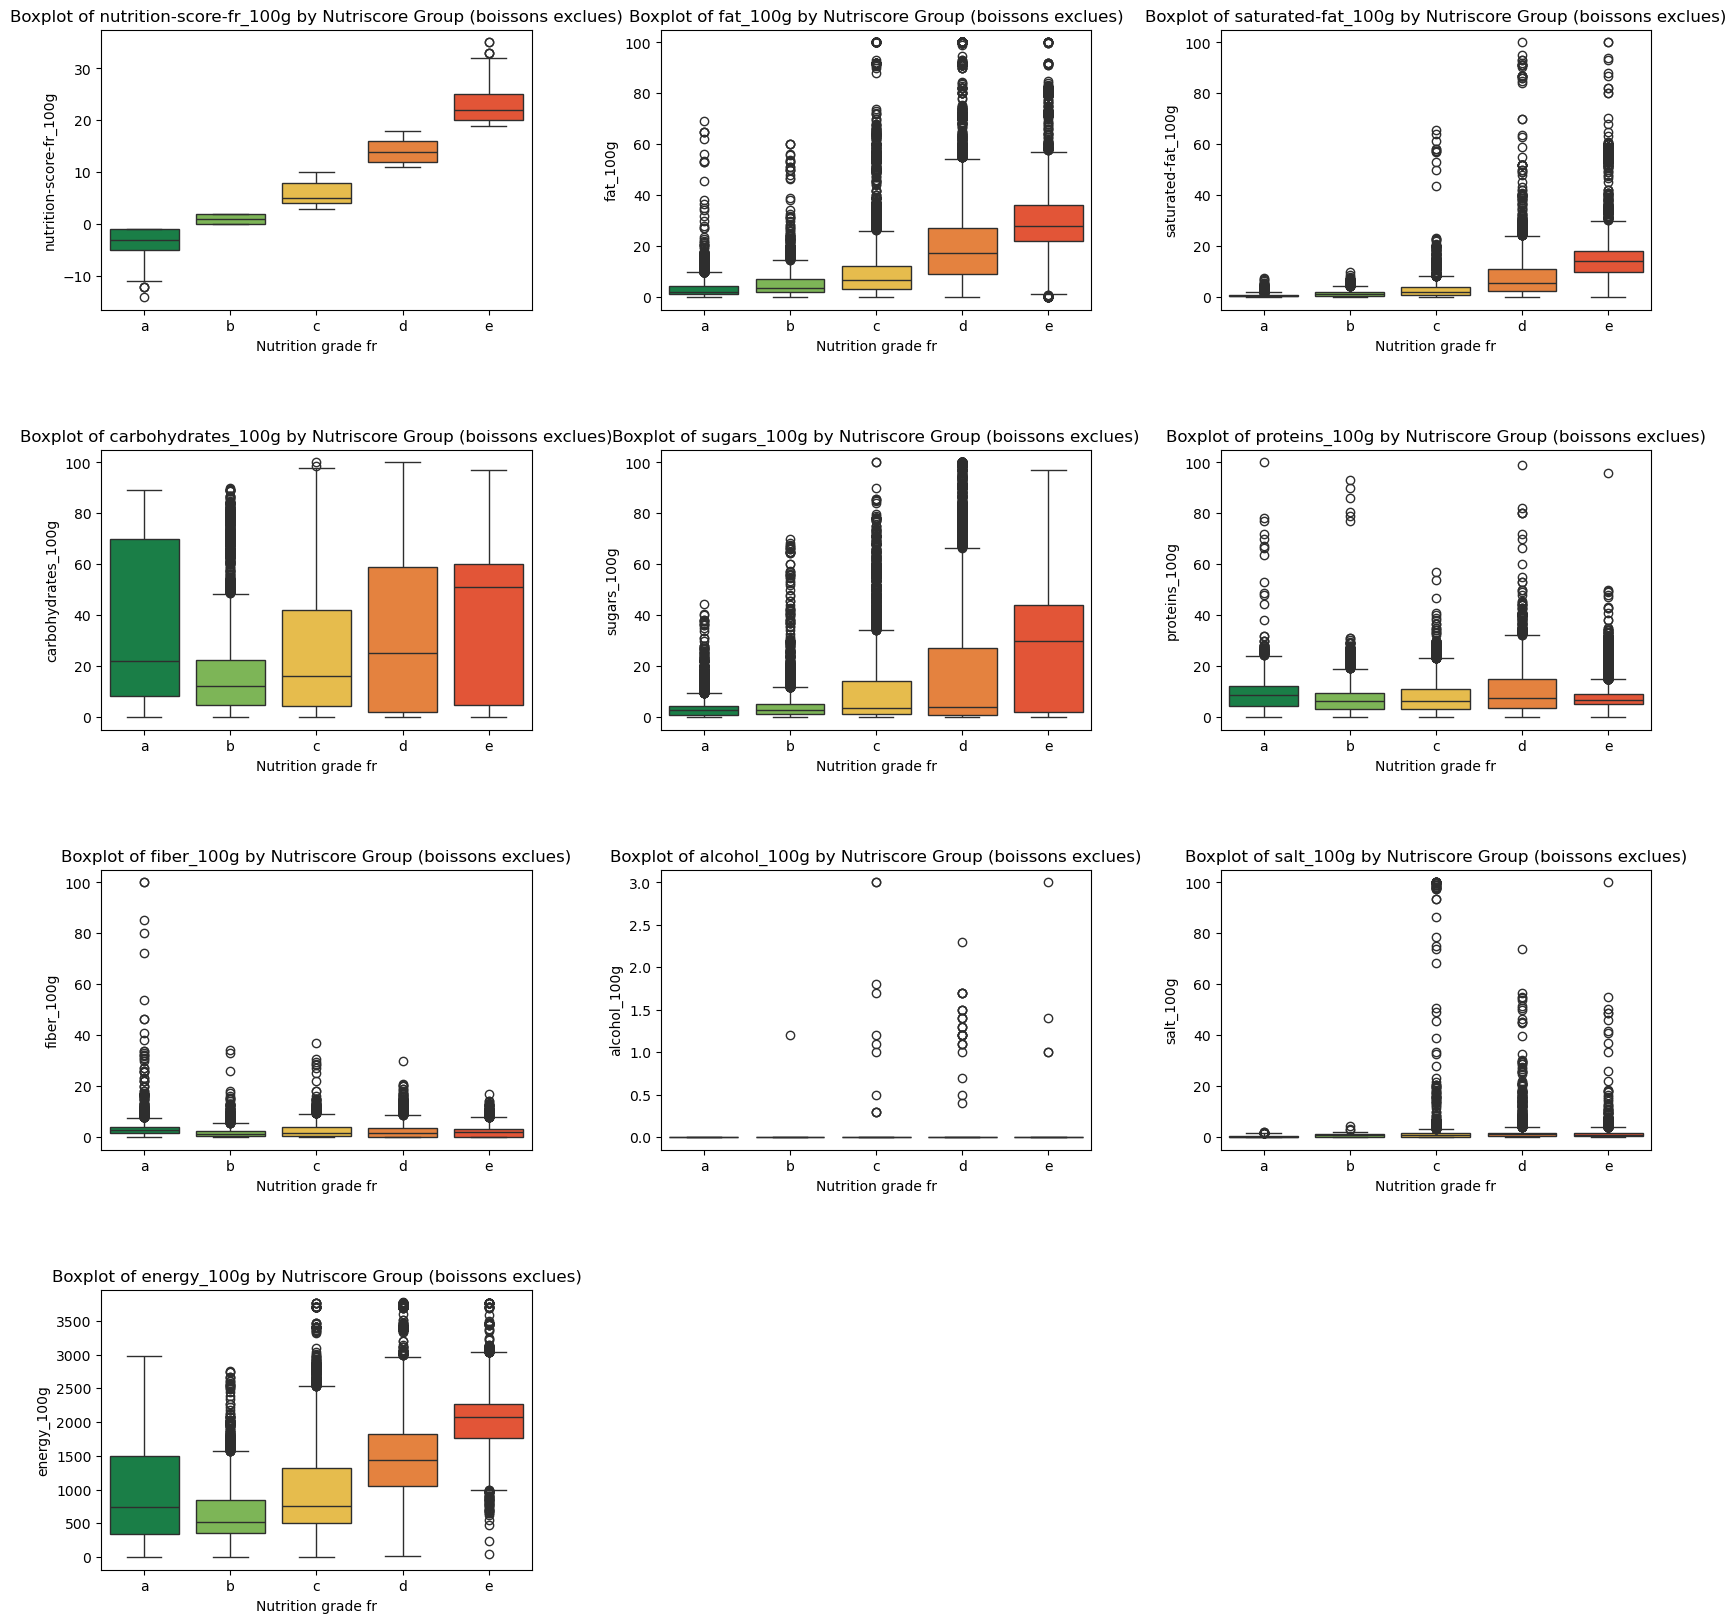

In [70]:
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Parcourir chaque colonne numérique et créer un boxplot pour chaque groupe de nutriscore
for i, col in enumerate(numerics_col):
    row = i // 3  # ligne
    col_num = i % 3  # colonne
    ax = axes[row, col_num]
    sns.boxplot(x='nutrition_grade_fr', y=col, data=df_cleaned_autre, ax=ax, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
    ax.set_xlabel('Nutrition grade fr')
    ax.set_ylabel(col)
    ax.set_title(f'Boxplot of {col} by Nutriscore Group (boissons exclues)')

# Supprimer les axes vides
for i in range(len(numerics_col), 4 * 3):
    row = i // 3
    col_num = i % 3
    fig.delaxes(axes[row, col_num])

plt.show()

In [71]:
def extract_outliers_selective(df, cols):
    outliers_info = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_info[col] = df[mask]

    return outliers_info

In [72]:
# Créer un dictionnaire avec les outliers pour chaque groupe
grouped_outliers = {group: extract_outliers_selective(group_df, numerics_col) 
                    for group, group_df in grouped_dfs.items()}

# Afficher les outliers pour chaque groupe
for group, cols_outliers in grouped_outliers.items():
    group_outliers_info = [f"  {col} a {df.shape[0]} outliers" 
                           for col, df in cols_outliers.items() if not df.empty]

    # Afficher ssi des outliers sont présents
    if group_outliers_info:
        print(f"Groupe: {group}")
        print("\n".join(group_outliers_info))
        print() 


Groupe: a
  fat_100g a 68 outliers
  saturated-fat_100g a 82 outliers
  sugars_100g a 269 outliers
  proteins_100g a 13 outliers
  fiber_100g a 72 outliers

Groupe: b
  fat_100g a 46 outliers
  saturated-fat_100g a 12 outliers
  carbohydrates_100g a 215 outliers
  sugars_100g a 148 outliers
  proteins_100g a 18 outliers
  fiber_100g a 71 outliers
  alcohol_100g a 2 outliers
  salt_100g a 1 outliers
  energy_100g a 20 outliers

Groupe: c
  fat_100g a 286 outliers
  saturated-fat_100g a 136 outliers
  sugars_100g a 256 outliers
  proteins_100g a 7 outliers
  fiber_100g a 16 outliers
  alcohol_100g a 11 outliers
  salt_100g a 122 outliers
  energy_100g a 64 outliers

Groupe: d
  fat_100g a 269 outliers
  saturated-fat_100g a 65 outliers
  proteins_100g a 15 outliers
  fiber_100g a 39 outliers
  alcohol_100g a 27 outliers
  salt_100g a 169 outliers

Groupe: e
  nutrition-score-fr_100g a 1 outliers
  fat_100g a 32 outliers
  saturated-fat_100g a 303 outliers
  proteins_100g a 377 outliers
 

Le code suivante a été répété plusieurs fois afin de différencier les valeurs abérrantes des valeurs simplement atypiques.

Il nous reste encore beaucoup trop d'outliers pour être examinés à la main. Comme nous avons déjà supprimé les valeurs complètements impossible avec l'approche métier, nous supposerons qu'il s'agit uniquement de valeurs atypiques.

Maintenant que nous avons géré les valeurs abérrantes, le nom des produits ne nous apportera plus d'information pour la suite de notre étude.

In [73]:
df_cleaned = df_cleaned.drop(['product_name'], axis=1)

## Traitement des valeurs manquantes

In [74]:
# Valeurs manquantes
missing_values_count = df_cleaned.isnull().sum()
total_cells = np.product(df_cleaned.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 14.26 %


In [75]:
percent_missing_values =  round((missing_values_count / len(df_cleaned)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
nutrition_grade_fr,0,0.00
nutrition-score-fr_100g,0,0.00
fat_100g,3412,8.65
saturated-fat_100g,81,0.21
carbohydrates_100g,3468,8.79
sugars_100g,84,0.21
proteins_100g,114,0.29
fiber_100g,14569,36.94
alcohol_100g,39010,98.90
salt_100g,82,0.21


<Axes: >

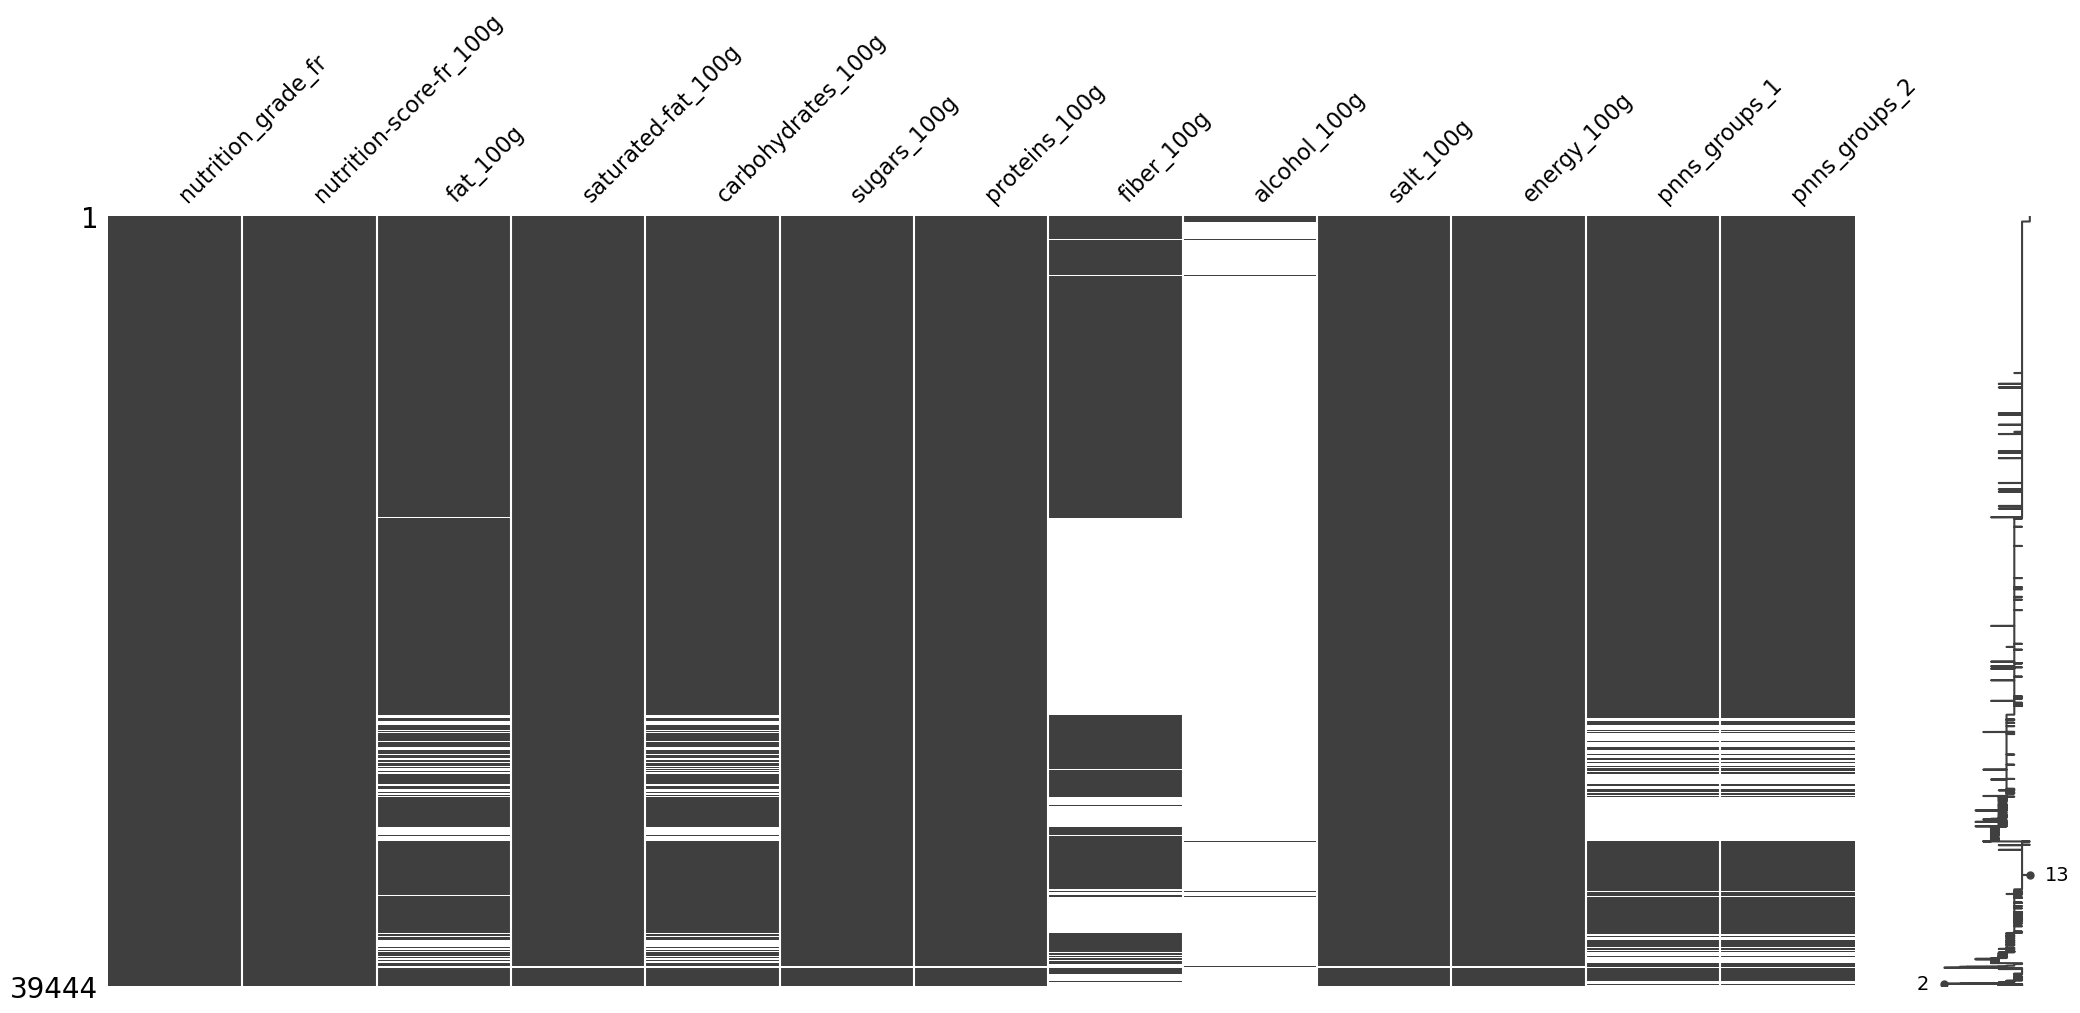

In [76]:
msno.matrix(df_cleaned)

<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

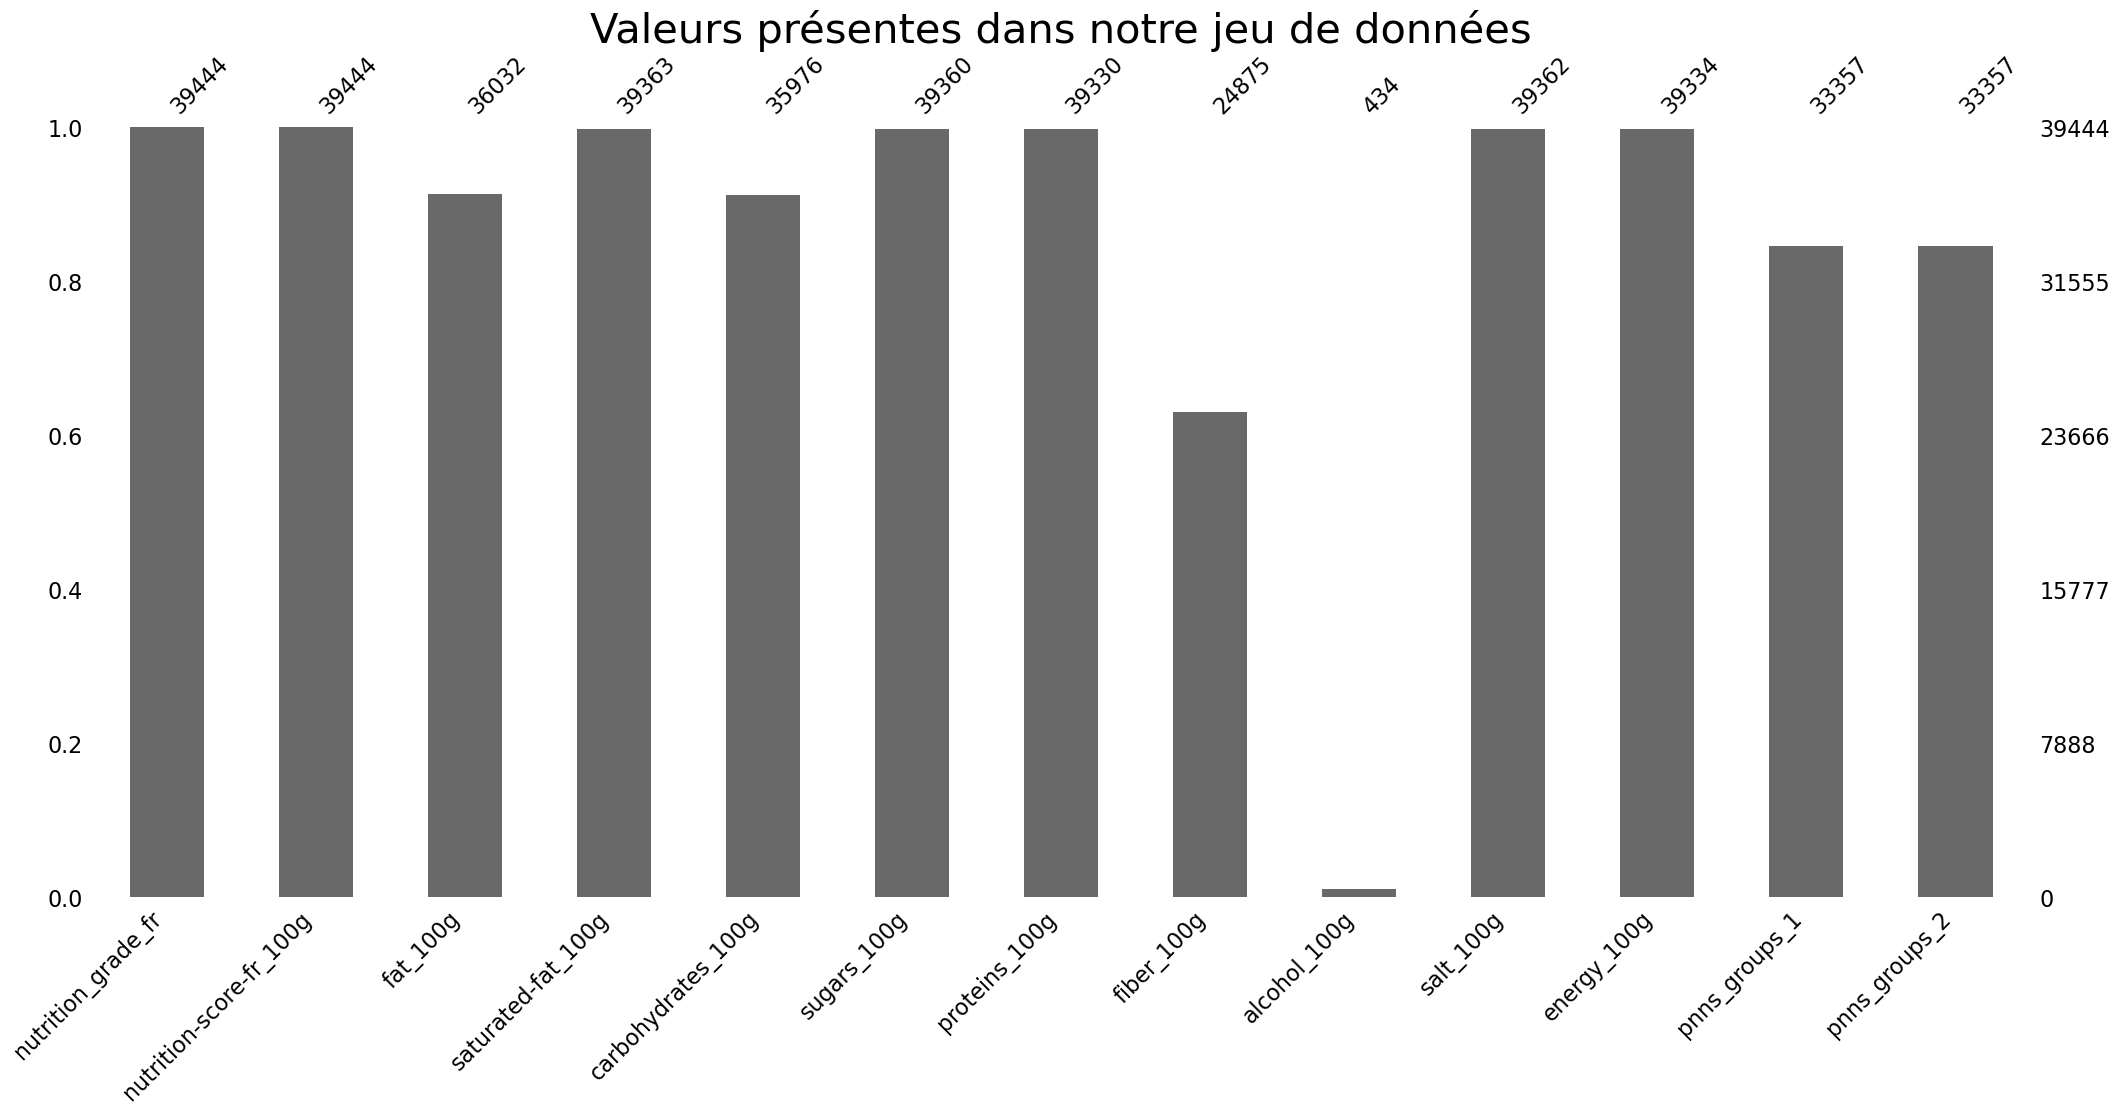

In [77]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(df_cleaned)

<Axes: >

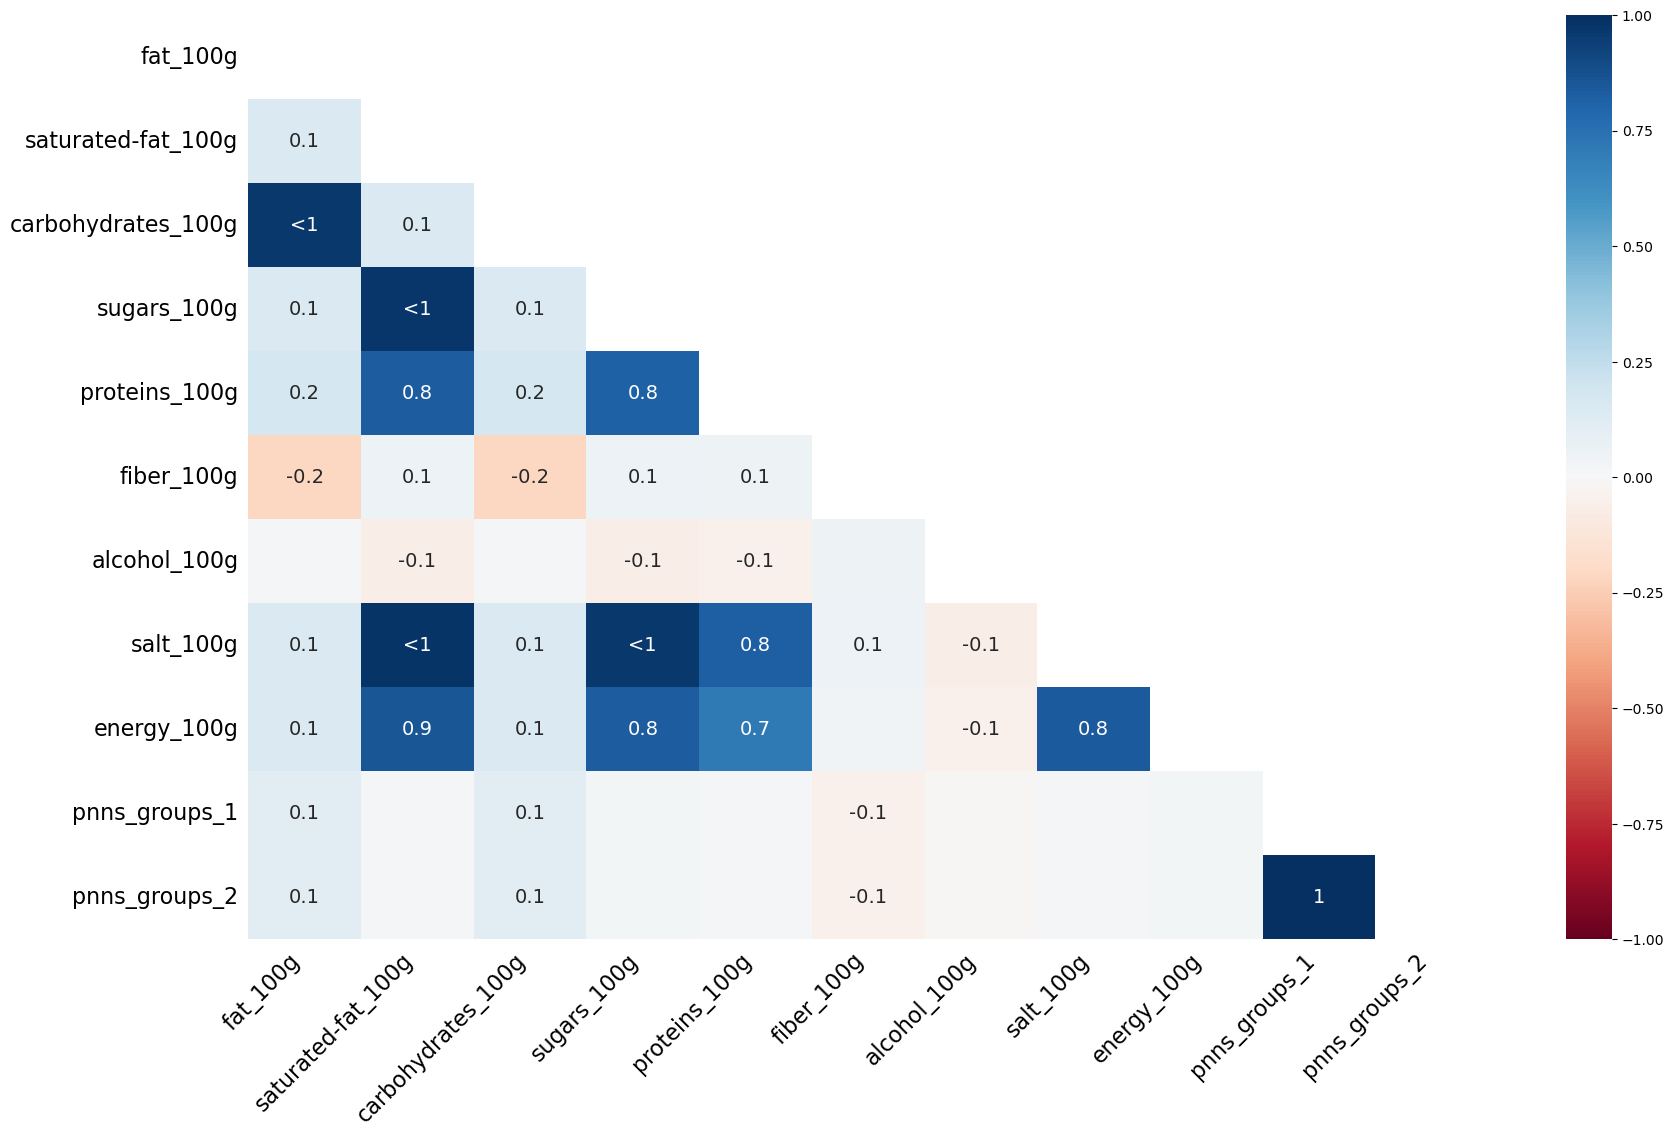

In [78]:
msno.heatmap(df_cleaned)

On note dans nos variables manquantes que si le pnns_groups_1 est manquant alors le pnns_groups_2 est manquant également.<br>
On note également les fortes corrélation existantes entres d'autres variables qui suggèrent que lorsqu'un produit n'a pas été renseigné pour une variable il y a souvent d'autres variables qui n'ont pas été remplies pour ce même produit.

### Complétion à 0

#### Les fibres

In [79]:
def fill_fibres_nan(dataframe):
    dataframe['fiber_100g'].fillna(0, inplace=True)
    return dataframe


In [80]:
df_completed = fill_fibres_nan(df_cleaned)

#### Les nutriments

L'energy_100g est calculée en KJ. La formule est donc :<br>
Energie (kJ)=(Protéines(g) × 17)+(Lipides(g) × 37)+(Glucides(g) × 17)+(Alcool(g) × 29)<br>
Si le calcul de l'energie est coherant en replacant la valeur des nutriments NaN par 0 on effectue la complétion à 0.

In [81]:
def calcul_no_lipide(df):
    # Créer des copies temporaires des colonnes utilisées dans le calcul
    glucides = df['carbohydrates_100g'].fillna(0)
    proteines = df['proteins_100g'].fillna(0)
    alcool = df['alcohol_100g'].fillna(0)

    # Créer une nouvelle colonne avec la somme des valeurs caloriques calculées à partir des macronutriments
    df['calculated_energy'] = glucides * 17 + proteines * 17 + alcool * 29
    
    # Calculer la condition où l'énergie calculée est égale à 'energy_kcal_100g' avec une marge de 5%
    condition = abs(df['calculated_energy'] - df['energy_100g']) <= 0.05 * df['energy_100g']

    # Compteur pour les cas où 'fat_100g' est mis à 0
    count_fat_set_to_zero = 0

    # Pour les lignes où 'fat_100g' est NaN et la condition est vraie, mettre 'fat_100g' à 0
    # et incrémenter le compteur
    for index, row in df.iterrows():
        if pd.isna(row['fat_100g']) and condition[index]:
            df.at[index, 'fat_100g'] = 0
            count_fat_set_to_zero += 1

    # Supprimer la colonne d'énergie calculée
    df.drop('calculated_energy', axis=1, inplace=True)

    print(count_fat_set_to_zero, 'valeurs ont été complétés à 0')

    return df

In [82]:
df_completed = calcul_no_lipide(df_completed)

83 valeurs ont été complétés à 0


In [83]:
def calcul_no_glucides(df):
    # Créer des copies temporaires des colonnes utilisées dans le calcul
    lipides = df['fat_100g'].fillna(0)
    proteines = df['proteins_100g'].fillna(0)
    alcool = df['alcohol_100g'].fillna(0)

    # Créer une nouvelle colonne avec la somme des valeurs caloriques calculées à partir des macronutriments
    df['calculated_energy'] = lipides * 37 + proteines * 17 + alcool * 29
    
    # Calculer la condition où l'énergie calculée est égale à 'energy_kcal_100g' avec une marge de 5%
    condition = abs(df['calculated_energy'] - df['energy_100g']) <= 0.05 * df['energy_100g']

    # Compteur pour les cas où 'carbohydrates_100g' est mis à 0
    count_set_to_zero = 0

    # Pour les lignes où 'carbohydrates_100g' est NaN et la condition est vraie, mettre 'carbohydrates_100g' à 0
    # et incrémenter le compteur
    for index, row in df.iterrows():
        if pd.isna(row['carbohydrates_100g']) and condition[index]:
            df.at[index, 'carbohydrates_100g'] = 0
            count_set_to_zero += 1

    # Supprimer la colonne d'énergie calculée
    df.drop('calculated_energy', axis=1, inplace=True)

    print(count_set_to_zero, 'valeurs ont été complétés à 0')

    return df

In [84]:
df_completed = calcul_no_glucides(df_completed)

129 valeurs ont été complétés à 0


In [85]:
def calcul_no_prot(df):
    # Créer des copies temporaires des colonnes utilisées dans le calcul
    lipides = df['fat_100g'].fillna(0)
    glucides = df['carbohydrates_100g'].fillna(0)
    alcool = df['alcohol_100g'].fillna(0)

    # Créer une nouvelle colonne avec la somme des valeurs caloriques calculées à partir des macronutriments
    df['calculated_energy'] = lipides * 37 + glucides * 17 + alcool * 29
    
    # Calculer la condition où l'énergie calculée est égale à 'energy_kcal_100g' avec une marge de 5%
    condition = abs(df['calculated_energy'] - df['energy_100g']) <= 0.05 * df['energy_100g']

    # Compteur pour les cas où 'carbohydrates_100g' est mis à 0
    count_set_to_zero = 0

    # Pour les lignes où 'carbohydrates_100g' est NaN et la condition est vraie, mettre 'proteins_100g' à 0
    # et incrémenter le compteur
    for index, row in df.iterrows():
        if pd.isna(row['proteins_100g']) and condition[index]:
            df.at[index, 'proteins_100g'] = 0
            count_set_to_zero += 1

    # Supprimer la colonne d'énergie calculée
    df.drop('calculated_energy', axis=1, inplace=True)

    print(count_set_to_zero, 'valeurs ont été complétés à 0')

    return df

In [86]:
df_completed = calcul_no_prot(df_completed)

0 valeurs ont été complétés à 0


In [87]:
def calcul_no_alcool(df):
    # Créer des copies temporaires des colonnes utilisées dans le calcul
    lipides = df['fat_100g'].fillna(0)
    glucides = df['carbohydrates_100g'].fillna(0)
    proteines = df['proteins_100g'].fillna(0)

    # Créer une nouvelle colonne avec la somme des valeurs caloriques calculées à partir des macronutriments
    df['calculated_energy'] = lipides * 37 + glucides * 17 + proteines * 17
    
    # Calculer la condition où l'énergie calculée est égale à 'energy_kcal_100g' avec une marge de 10%
    condition = abs(df['calculated_energy'] - df['energy_100g']) <= 0.1 * df['energy_100g']

    # Compteur pour les cas où 'carbohydrates_100g' est mis à 0
    count_set_to_zero = 0

    # Pour les lignes où 'carbohydrates_100g' est NaN et la condition est vraie, mettre 'alcohol_100g' à 0
    # et incrémenter le compteur
    for index, row in df.iterrows():
        if pd.isna(row['alcohol_100g']) and condition[index]:
            df.at[index, 'alcohol_100g'] = 0
            count_set_to_zero += 1

    # Supprimer la colonne d'énergie calculée
    df.drop('calculated_energy', axis=1, inplace=True)

    print(count_set_to_zero, 'valeurs ont été complétés à 0')

    return df

In [88]:
df_completed = calcul_no_alcool(df_completed)

35656 valeurs ont été complétés à 0


In [89]:
def no_sugars(df):
    # Compter le nombre de cas où 'carbohydrates_100g' est 0 et 'sugars_100g' est NaN
    count = ((df['carbohydrates_100g'] == 0) & (pd.isna(df['sugars_100g']))).sum()
    print('Il y a', count, 'cas où le sucre est mis à 0 pour être cohérent avec les glucides.')

    # Mettre à jour 'sugars_100g' en le mettant à 0 lorsque 'carbohydrates_100g' est 0
    df.loc[df['carbohydrates_100g'] == 0, 'sugars_100g'] = 0
    
    return df


In [90]:
df_completed = no_sugars(df_completed)

Il y a 0 cas où le sucre est mis à 0 pour être cohérent avec les glucides.


In [91]:
def no_saturatedfat(df):
    # Compter le nombre de cas où 'fat_100g' est 0 et 'saturated-fat_100g' est NaN
    count = ((df['fat_100g'] == 0) & (pd.isna(df['saturated-fat_100g']))).sum()
    print('Il y a', count, 'cas où les graisses saturées est mis à 0 pour être cohérent avec les lipides total.')

    # Mettre à jour 'saturated-fat_100g' en le mettant à 0 lorsque 'fat_100g' est 0
    df.loc[df['fat_100g'] == 0, 'saturated-fat_100g'] = 0
    
    return df


In [92]:
df_completed = no_saturatedfat(df_completed)

Il y a 0 cas où les graisses saturées est mis à 0 pour être cohérent avec les lipides total.


In [93]:
# Valeurs manquantes
missing_values_count = df_completed.isnull().sum()
total_cells = np.product(df_completed.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 4.42 %


In [94]:
percent_missing_values =  round((missing_values_count / len(df_completed)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
nutrition_grade_fr,0,0.00
nutrition-score-fr_100g,0,0.00
fat_100g,3329,8.44
saturated-fat_100g,81,0.21
carbohydrates_100g,3339,8.47
sugars_100g,84,0.21
proteins_100g,114,0.29
fiber_100g,0,0.00
alcohol_100g,3354,8.50
salt_100g,82,0.21


<Axes: >

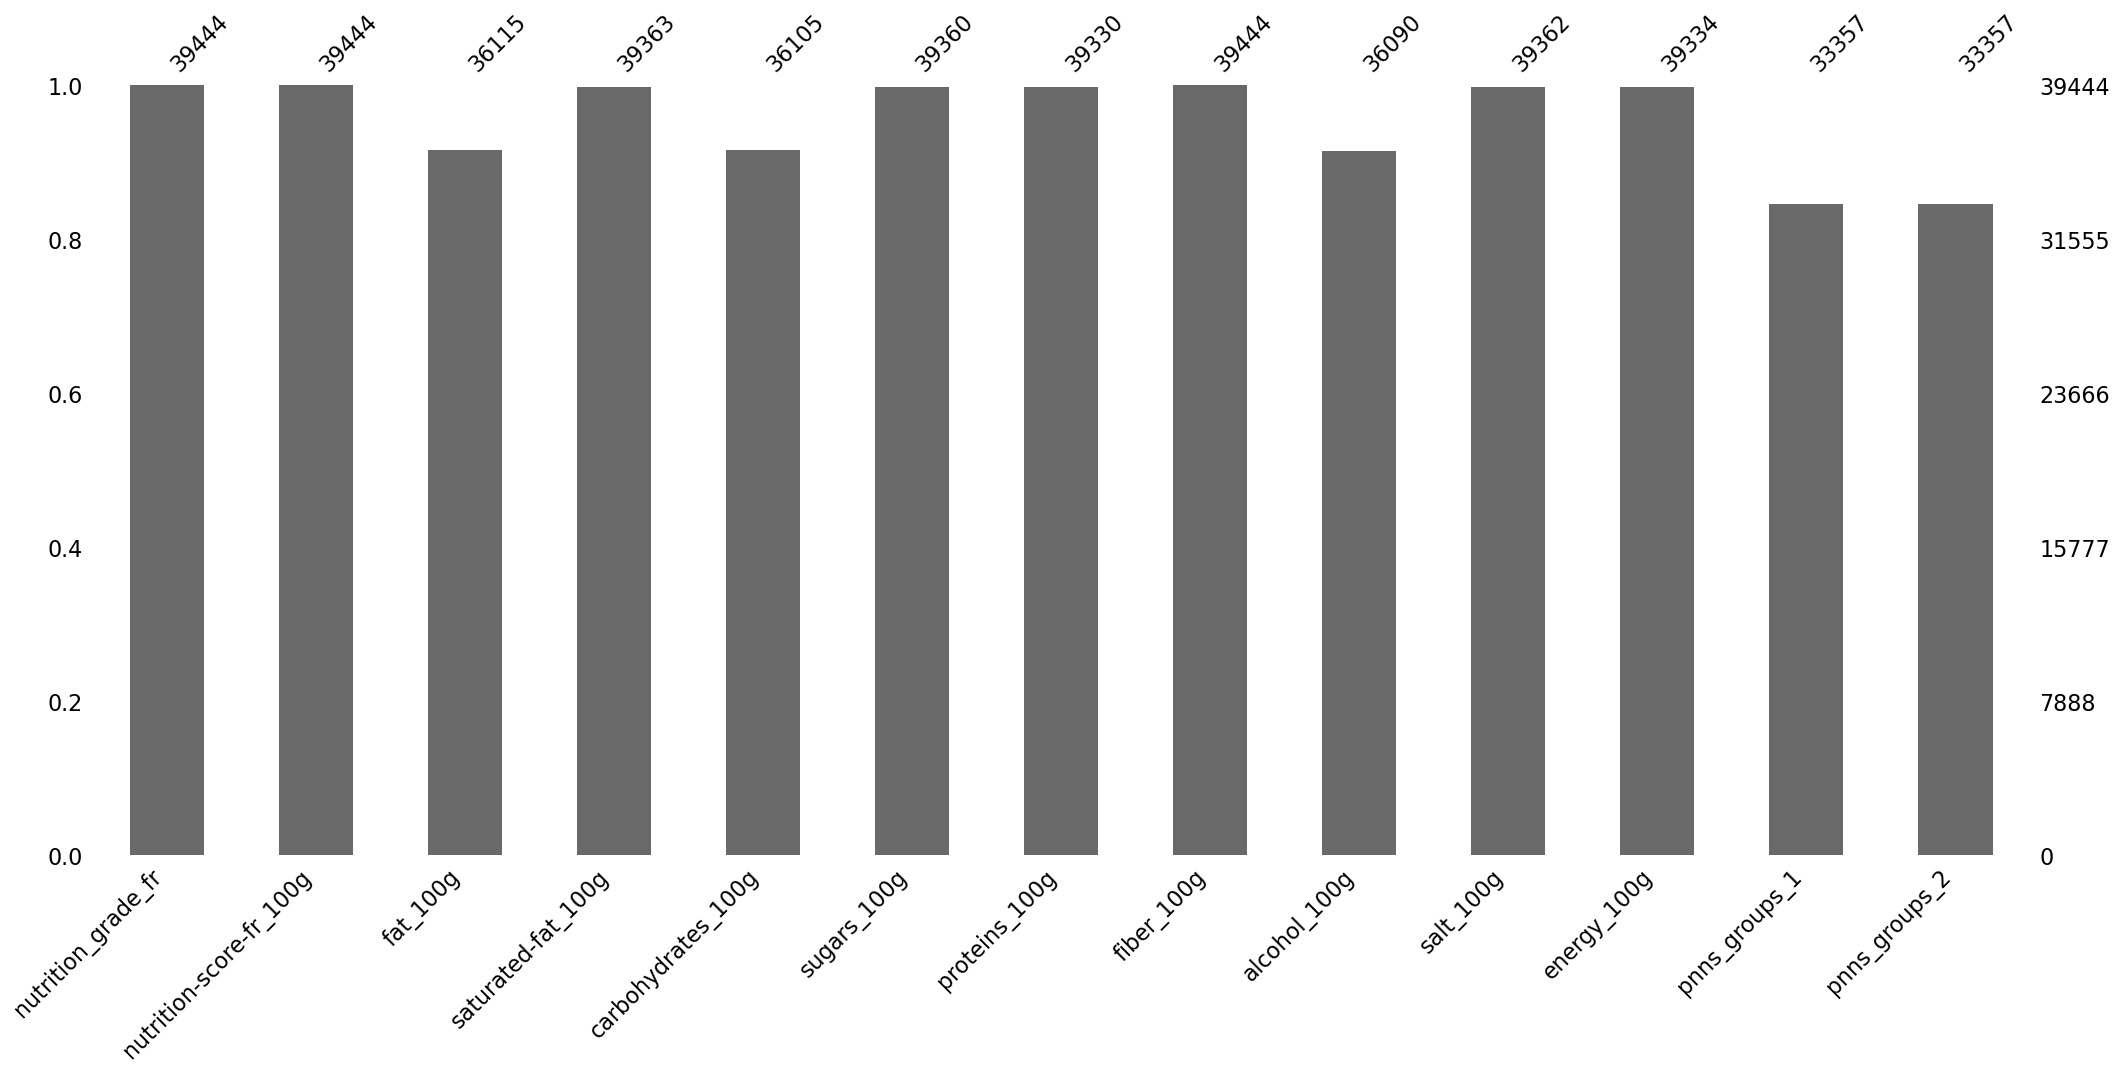

In [95]:
msno.bar(df_completed)

In [96]:
df_completed.shape

(39444, 13)

### KNeighborsClassifier

In [97]:
def impute_knn_categories(df, target_column, numerics_col, n_neighbors=5):
    # Copie du DataFrame original pour éviter de le modifier
    original_df = df.copy()
    df_knn = original_df.dropna(subset=numerics_col + [target_column])
    
    # Encodage de la colonne cible
    le = LabelEncoder()
    y_encoded = le.fit_transform(df_knn[target_column])
  
    # Séparation des features et de la target
    X = df_knn[numerics_col]
    y = y_encoded
    
    # Séparation des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Recherche du meilleur nombre de voisins
    param_grid = {'n_neighbors': range(2, 15)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Entraînement du modèle avec le meilleur nombre de voisins
    best_knn = grid_search.best_estimator_
    best_knn.fit(X_train, y_train)
    
    # Prédiction des labels pour l'ensemble de test
    y_pred = best_knn.predict(X_test)
    
    # Évaluation de la précision
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision: {accuracy}, avec n_neighbors: {best_knn.n_neighbors}")
    
    # Prédiction des valeurs manquantes pour le DataFrame original
    missing_values_index = original_df[target_column].isna()
    df_missing = original_df.loc[missing_values_index, numerics_col]
    df_missing = df_missing.dropna()
    df_missing_notna = df_missing.dropna()
    
    # Vérifiez si nous avons des lignes à prédire
    if not df_missing.empty:
        predicted_labels = best_knn.predict(df_missing)
        # Inverse transformation to get original labels
        predicted_labels = le.inverse_transform(predicted_labels)
        # Assign predictions back to the original DataFrame
        original_df.loc[df_missing_notna.index, target_column] = predicted_labels

        return original_df


In [98]:
imputed_df = impute_knn_categories(df_completed, 'pnns_groups_1', numerics_col)

Précision: 0.8915993537964458, avec n_neighbors: 3


In [99]:
imputed_df = impute_knn_categories(imputed_df, 'pnns_groups_2', numerics_col)

Précision: 0.7791599353796446, avec n_neighbors: 3


<Axes: >

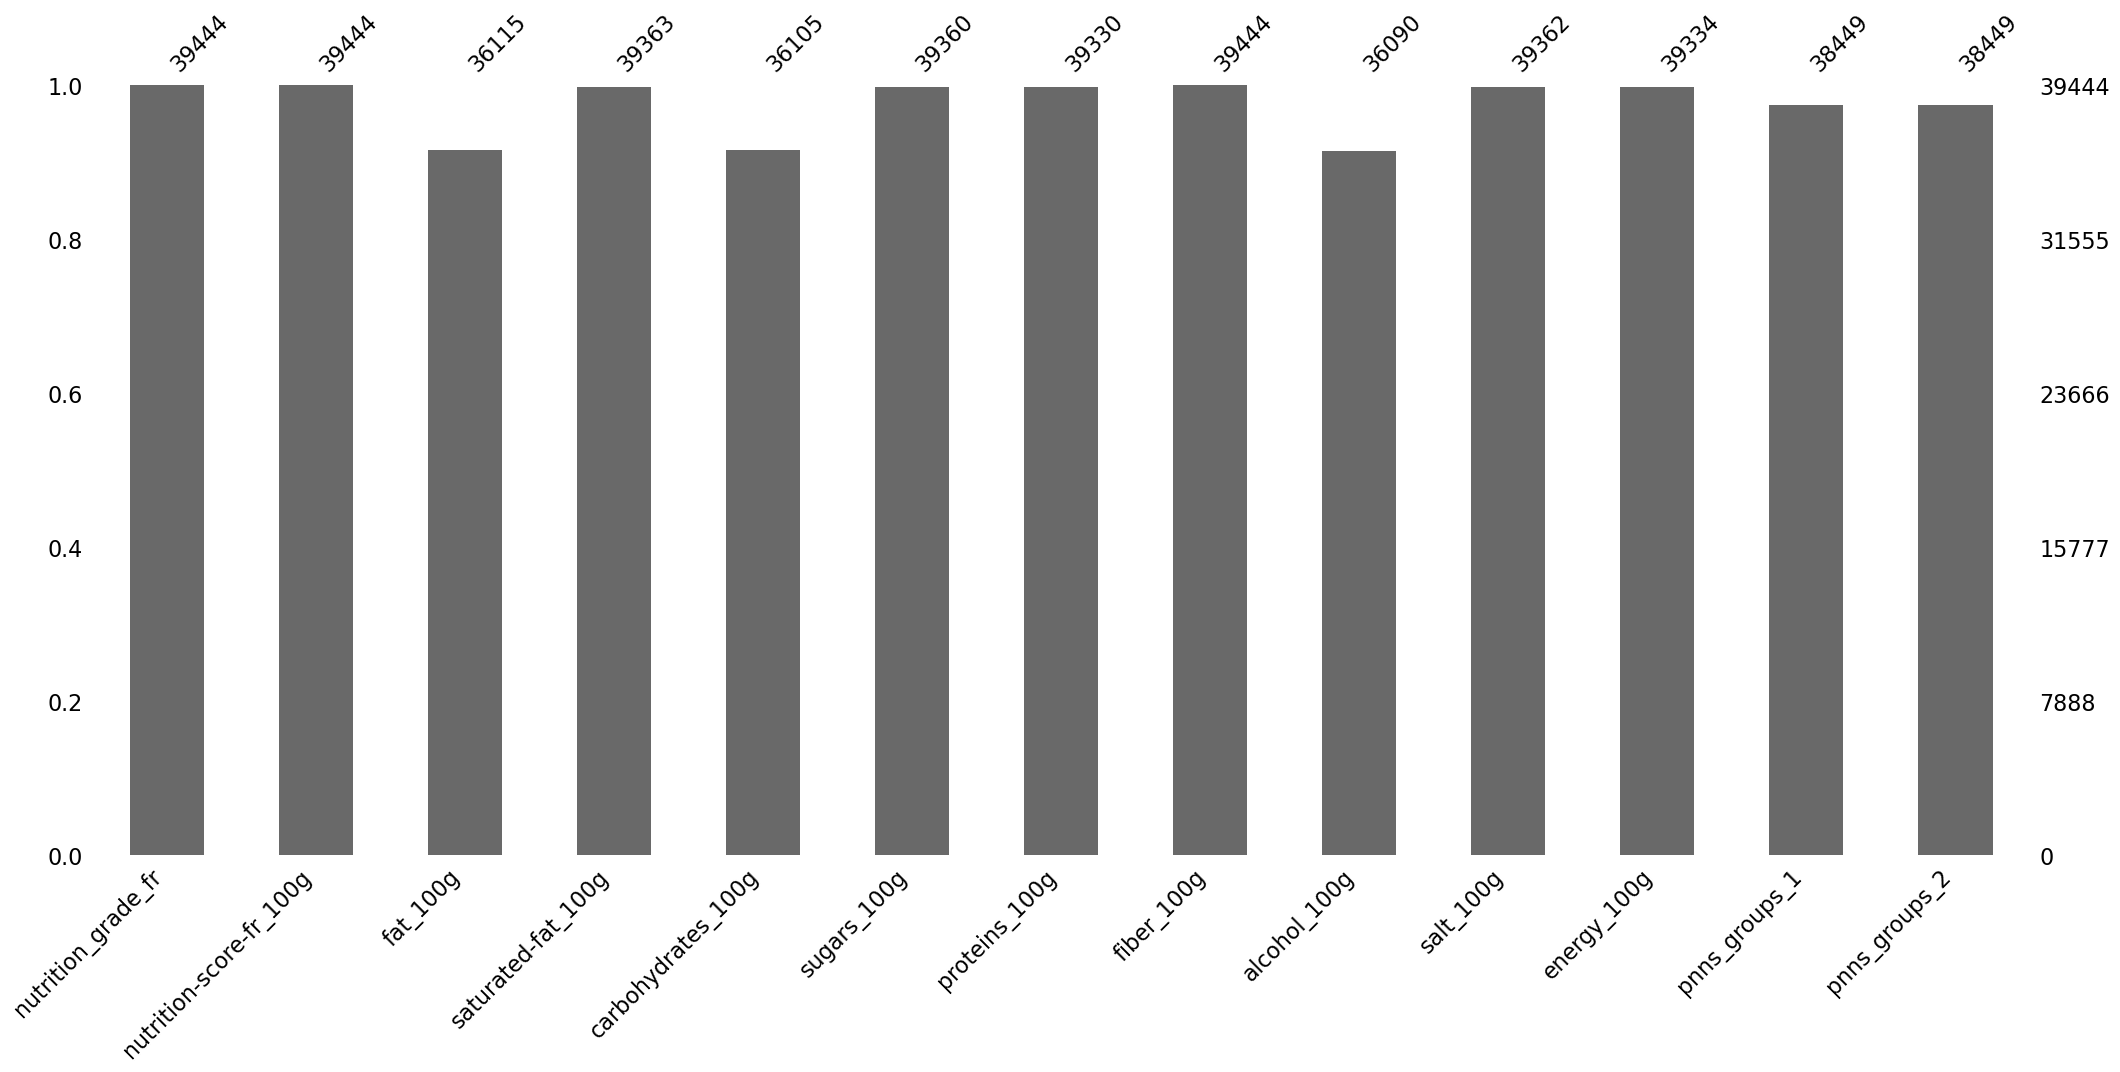

In [100]:
msno.bar(imputed_df)

In [101]:
imputed_df.head(5)

,nutrition_grade_fr,nutrition-score-fr_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,alcohol_100g,salt_100g,energy_100g,pnns_groups_1,pnns_groups_2
204292,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000330,0.0,beverages,non-sugared beverages
280434,b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025400,0.0,beverages,sweetened beverages
208514,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002134,0.0,beverages,non-sugared beverages
212007,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000787,0.0,beverages,non-sugared beverages
232808,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000559,0.0,beverages,non-sugared beverages


### Imputation par mediane du groupe (pnns groups 2)

In [102]:
# Pour chaque colonne se terminant par '_100g', remplacer les valeurs NaN par la médiane du même groupe pnns_groups_2
modified_counts = {}

for col in imputed_df.columns:
    if col.endswith('_100g') and imputed_df[col].dtype in ['float64', 'int64']:
        # Calculer la médiane pour chaque groupe de pnns_groups_2
        medians = imputed_df.groupby('pnns_groups_2')[col].transform('median')
        
        # Compter les valeurs NaN avant remplacement
        count_before = imputed_df[col].isna().sum()
        
        # Remplacer les valeurs NaN par la médiane correspondante
        imputed_df[col].fillna(medians, inplace=True)
        
        # Compter les valeurs NaN après remplacement
        count_after = imputed_df[col].isna().sum()
        
        # Calculer le nombre de valeurs modifiées
        modified_counts[col] = count_before - count_after



In [103]:
# Afficher le nombre de valeurs modifiées pour chaque colonne
for col, count in modified_counts.items():
    print(f"{count} valeurs ont été modifiées dans la colonne {col}.")

0 valeurs ont été modifiées dans la colonne nutrition-score-fr_100g.
2360 valeurs ont été modifiées dans la colonne fat_100g.
55 valeurs ont été modifiées dans la colonne saturated-fat_100g.
2360 valeurs ont été modifiées dans la colonne carbohydrates_100g.
55 valeurs ont été modifiées dans la colonne sugars_100g.
80 valeurs ont été modifiées dans la colonne proteins_100g.
0 valeurs ont été modifiées dans la colonne fiber_100g.
2364 valeurs ont été modifiées dans la colonne alcohol_100g.
55 valeurs ont été modifiées dans la colonne salt_100g.
74 valeurs ont été modifiées dans la colonne energy_100g.


In [104]:
df_completed.shape

(39444, 13)

<Axes: >

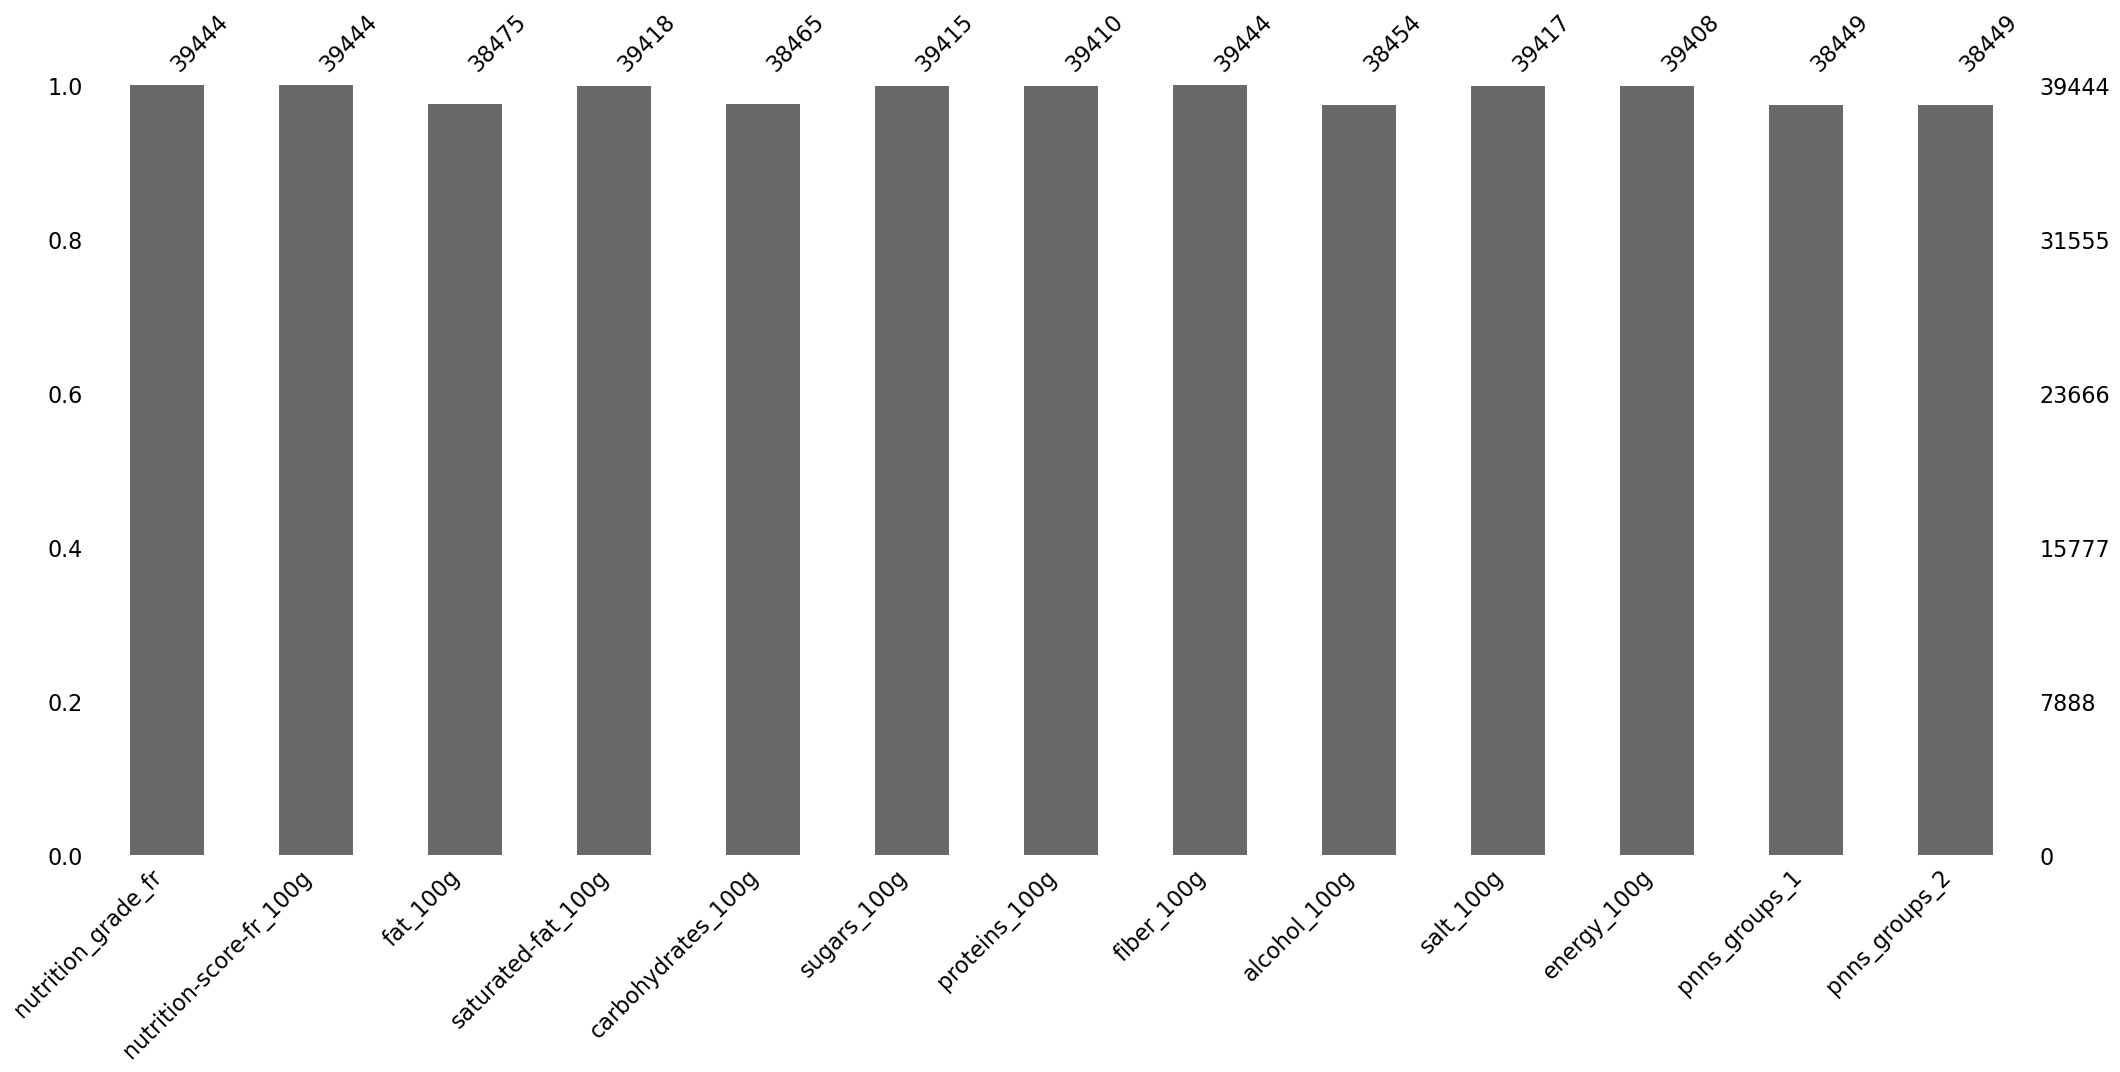

In [105]:
msno.bar(imputed_df)

### Suppression

On recheck les valeurs aberrantes après les imputations pour supprimer les incoherances créées.

In [106]:
imputed_df = validation_energy(imputed_df)

Nombre de lignes où l'energy et les nutriments ne sont pas cohérantes: 1943


In [107]:
imputed_df = validation_sucre_saturatedfat(imputed_df)

Nombre de lignes où les graisses saturées étaient incohérentes : 68
Nombre de lignes où les sucres étaient incohérents : 71


In [108]:
imputed_df = validation_nutrition_score(imputed_df, seuils_nutriscore)

Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade a: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade b: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade c: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade d: 0
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade e: 0


In [109]:
imputed_df = validation_nutrition_score_boisson(imputed_df, seuils_nutriscore_boissons)

Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade a: 16
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade b: 28
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade c: 43
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade d: 22
Nombre de lignes où les nutrtions score et grade étaient incohérents pour le grade e: 0


In [110]:
imputed_df.shape

(37261, 13)

In [111]:
# Valeurs manquantes
missing_values_count = imputed_df.isnull().sum()
total_cells = np.product(imputed_df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 1.05 %


Comme nous n'avons pas pu imputer certaines variables (environ 1%) nous decidons de les supprimer avant de passer à l'analyse.

In [112]:
imputed_df = imputed_df.dropna()

In [113]:
# Valeurs manquantes
missing_values_count = imputed_df.isnull().sum()
total_cells = np.product(imputed_df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


In [114]:
imputed_df.shape

(36266, 13)

# Analyse Exploratoire des Données

## Analyse Univariée

## Analyse Bivariée

In [115]:
# séparation des boissons et des autres aliments car le nutriscore n'est pas calculé de la même façon
df_cleaned_boisson = imputed_df[imputed_df['pnns_groups_1'] == "beverages"].copy()
df_cleaned_autre = imputed_df[imputed_df['pnns_groups_1'] != "beverages"].copy()

In [116]:
df_cleaned_boisson.shape

(2509, 13)

In [117]:
df_cleaned_autre.shape

(33757, 13)

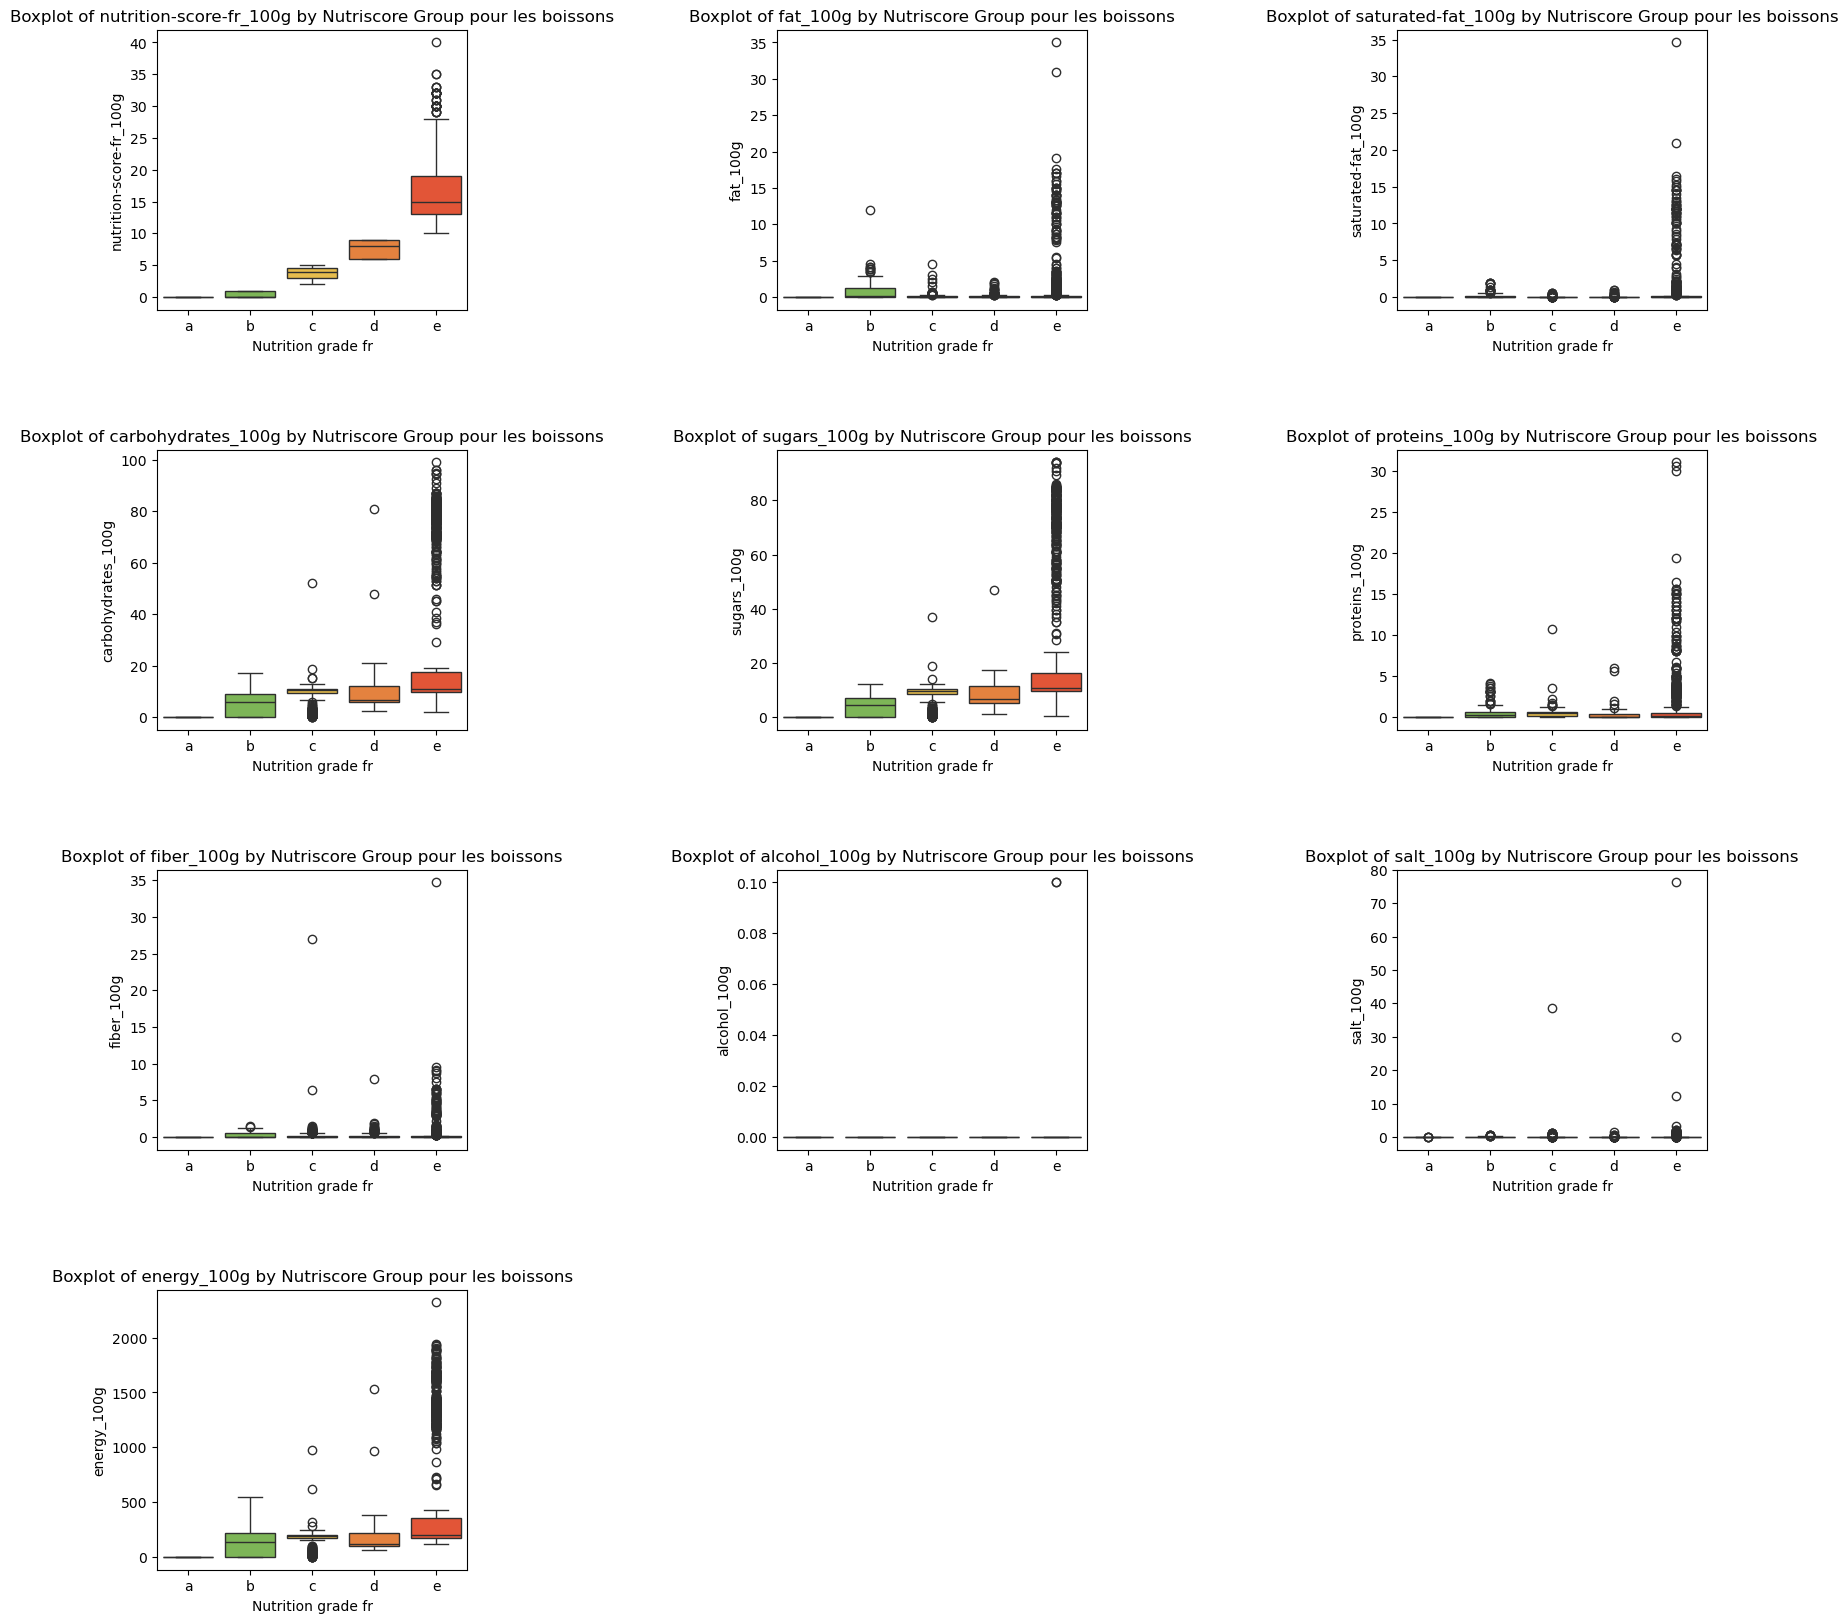

In [118]:
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=1)

# Parcourir chaque colonne numérique et créer un boxplot pour chaque groupe de nutriscore
for i, col in enumerate(numerics_col):
    row = i // 3  # ligne
    col_num = i % 3  # colonne
    ax = axes[row, col_num]
    sns.boxplot(x='nutrition_grade_fr', y=col, data=df_cleaned_boisson, ax=ax, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
    ax.set_xlabel('Nutrition grade fr')
    ax.set_ylabel(col)
    ax.set_title(f'Boxplot of {col} by Nutriscore Group pour les boissons')

# Supprimer les axes vides
for i in range(len(numerics_col), 4 * 3):
    row = i // 3
    col_num = i % 3
    fig.delaxes(axes[row, col_num])

plt.show()

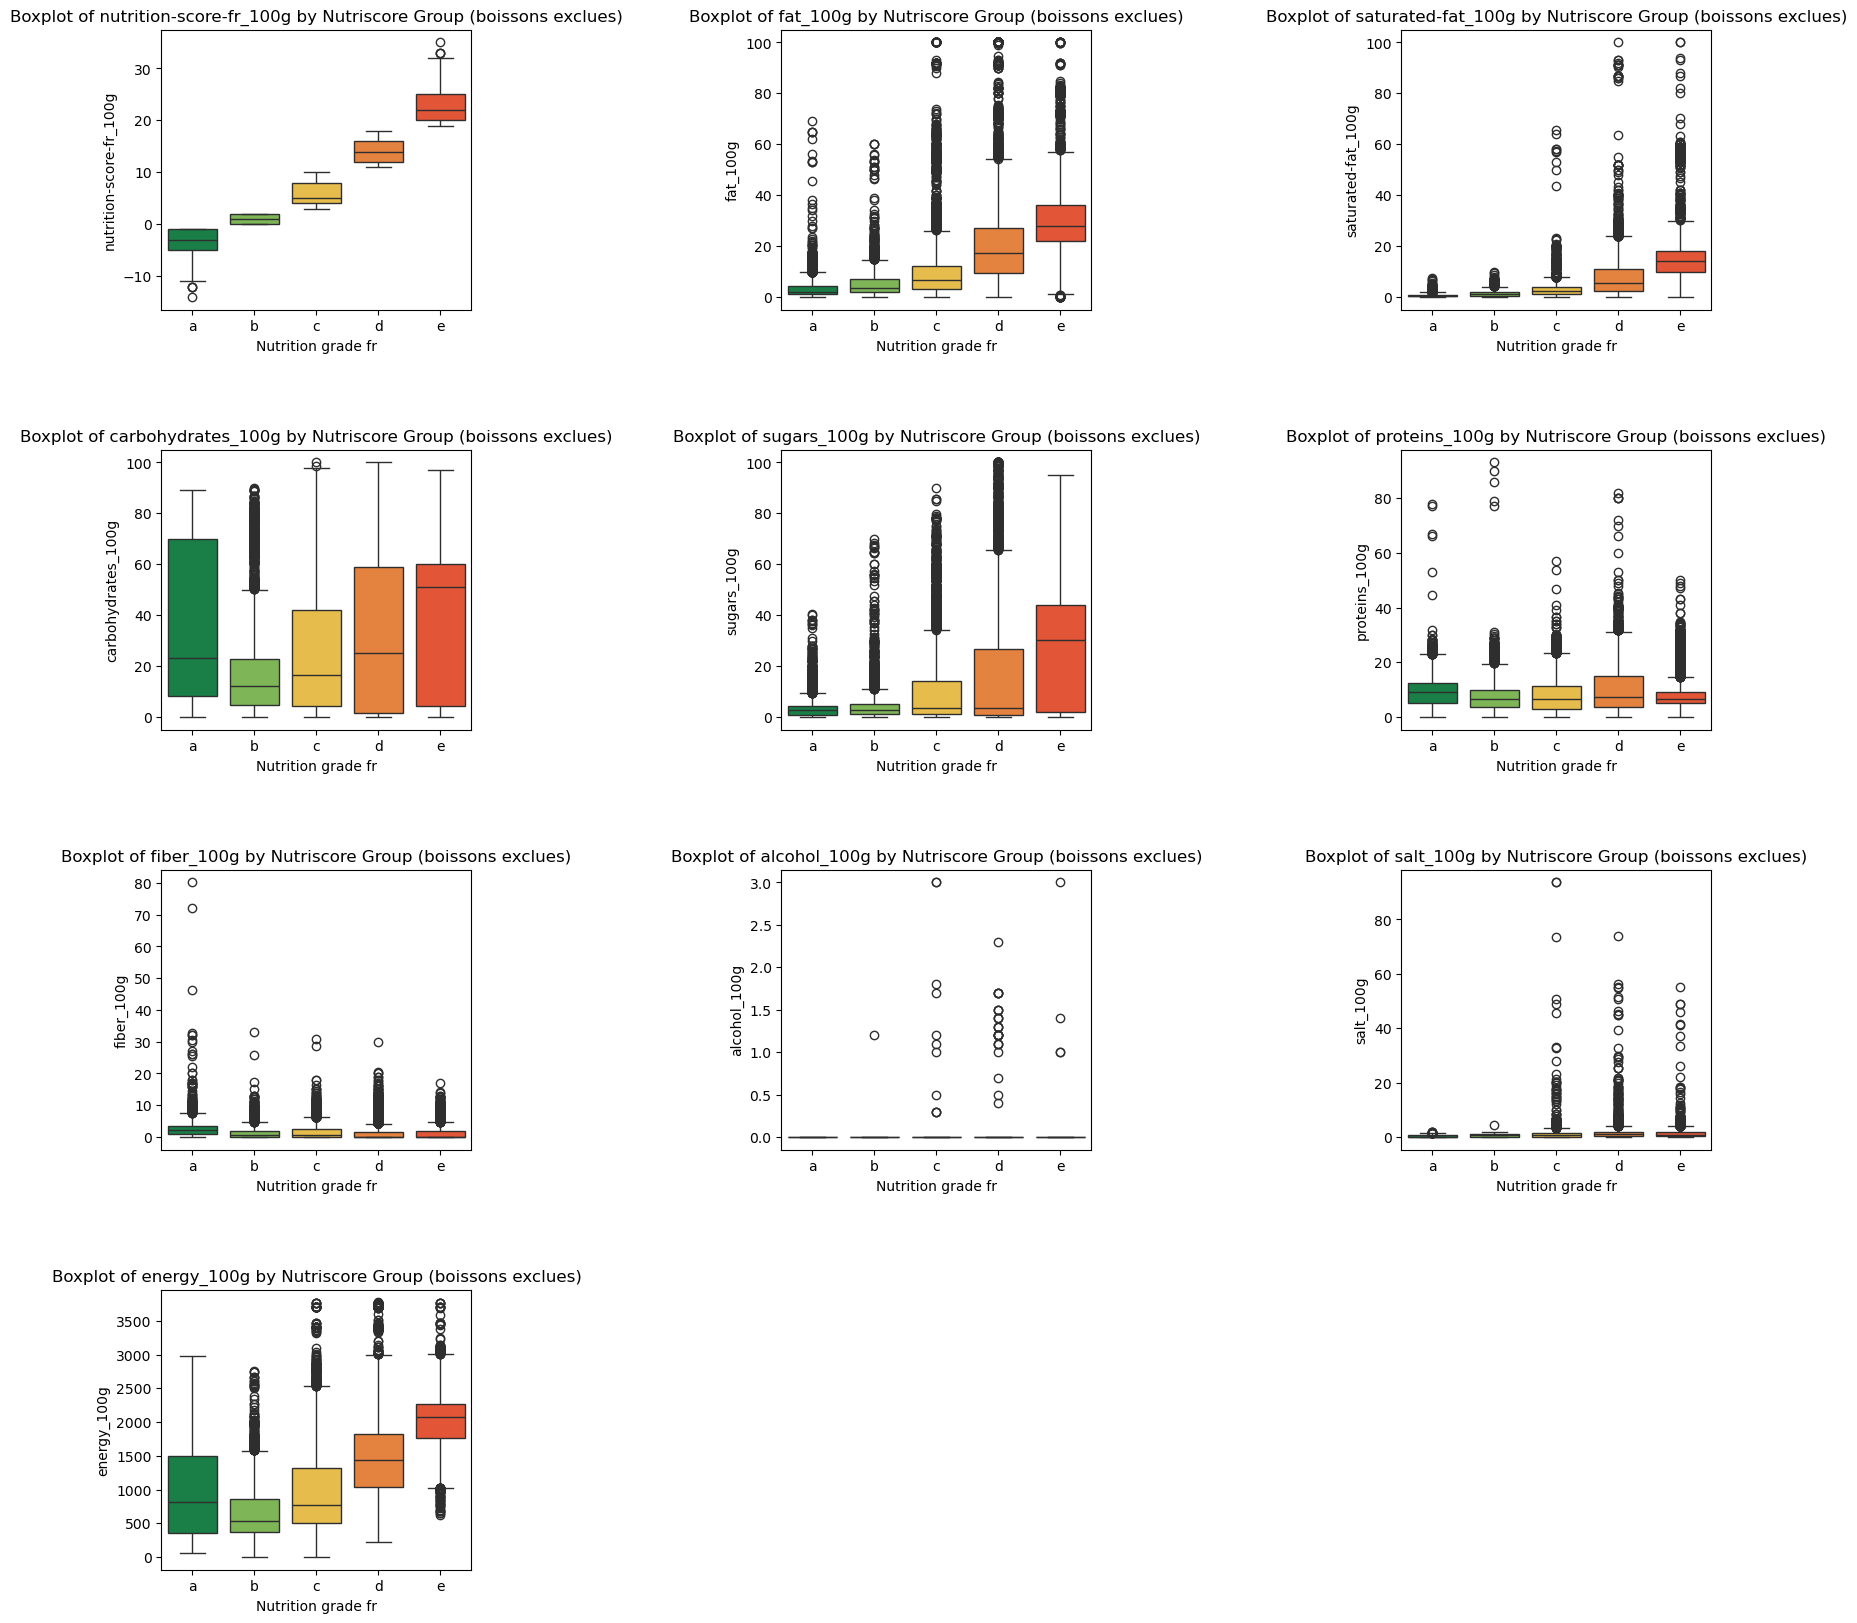

In [119]:
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=1)

# Parcourir chaque colonne numérique et créer un boxplot pour chaque groupe de nutriscore
for i, col in enumerate(numerics_col):
    row = i // 3  # ligne
    col_num = i % 3  # colonne
    ax = axes[row, col_num]
    sns.boxplot(x='nutrition_grade_fr', y=col, data=df_cleaned_autre, ax=ax, order=grade_order, hue='nutrition_grade_fr', palette=grade_colors, legend=False)
    ax.set_xlabel('Nutrition grade fr')
    ax.set_ylabel(col)
    ax.set_title(f'Boxplot of {col} by Nutriscore Group (boissons exclues)')

# Supprimer les axes vides
for i in range(len(numerics_col), 4 * 3):
    row = i // 3
    col_num = i % 3
    fig.delaxes(axes[row, col_num])

plt.show()

## Analyse Multivariée

ANOVA, ACP